# GML - Mini-Challenge 2 - HS 2022

**Ausgabe:** Montag, 13. November 2022  
**Abgabe:** Sonntag, 11. Dezember 2022, bis 24 Uhr 

In diesem Mini-Challenge implementieren und verwenden wir verschiedene Methoden der Klassifikation, machen Gebrauch von Model Selection-Prinzipien und -Algorithmen und stellen Gedanken zu Entscheidungsbäumen an.

#### Vorgaben zu Umsetzung und Abgabe


- Code muss in python geschrieben werden.
- Wir entwickeln zahlreiche Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss von Anfang bis Ende lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. Nur was korrekt ausführt wird bewertet.
- Es darf kein Code ausgelagert werden.
- Sämtliche **Plots** sind **komplett beschriftet** (Titel, Achsen, Labels, Colorbar, ..), sodass der Plot einfach verstanden werden kann.
- Zu jedem Plot gehört eine **kurze Diskussion**, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält. Nur vollständig beschriftete Plots mit dazugehörender Diskussion werden bewertet.
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.


- **Bitte lösche, dupliziere oder verschiebe die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Du darfst aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden. Wir kopierter Code oder Text identifiziert, so werden sämtliche betroffenen Aufgaben von allen Beteiligten mit 0 Punkten bewertet.**

---

### Aufgabe 1 - EDA (4 Punkte)

Lade den Datensatz `data/moto.csv` und verschaffe dir einen Überblick durch explorative Datenanalyse. Unser Ziel wird es sein, die Marke der Motorräder vorherzusagen unter Verwendung der übrigen Attribute. Teile deine Überlegungen zu diesem Problem.

In [5]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")   # ignore warnings

moto_original = pd.read_csv('moto.csv')             # import data
moto = moto_original.copy()    # use copy instead of the originial data
moto.head(2)

body_shape   colour condition  displacement             fuel  has_mfk  \
0    Strasse  schwarz       Neu         947.0  Benzin Bleifrei     True   
1    Strasse      rot       Neu         947.0  Benzin Bleifrei     True   

   performance  price  curb_weight  registration_age  mileage     brand  
0        125.0   9890        285.0                 0      1.0  Kawasaki  
1        125.0   9890        285.0                 0      1.0  Kawasaki

In [6]:
moto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   body_shape        5619 non-null   object 
 1   colour            5605 non-null   object 
 2   condition         5619 non-null   object 
 3   displacement      5619 non-null   float64
 4   fuel              5612 non-null   object 
 5   has_mfk           5619 non-null   bool   
 6   performance       5619 non-null   float64
 7   price             5619 non-null   int64  
 8   curb_weight       5619 non-null   float64
 9   registration_age  5619 non-null   int64  
 10  mileage           5619 non-null   float64
 11  brand             5619 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 488.5+ KB


- The data types are correct. 

In [7]:
moto.isna().sum()  # check na in each column

body_shape           0
colour              14
condition            0
displacement         0
fuel                 7
has_mfk              0
performance          0
price                0
curb_weight          0
registration_age     0
mileage              0
brand                0
dtype: int64

- there are 14 NA in 'colour', 7 NA in 'fuel', which is not a lot for our 5619 entries dataset.
- So I will simply drop the rows where there are any NA.

In [8]:
moto = moto.dropna(axis=0, how='any').reset_index(drop=True)  # drop rows include any NA, and reset index

In [9]:
moto.head(2)

body_shape   colour condition  displacement             fuel  has_mfk  \
0    Strasse  schwarz       Neu         947.0  Benzin Bleifrei     True   
1    Strasse      rot       Neu         947.0  Benzin Bleifrei     True   

   performance  price  curb_weight  registration_age  mileage     brand  
0        125.0   9890        285.0                 0      1.0  Kawasaki  
1        125.0   9890        285.0                 0      1.0  Kawasaki

In [10]:
moto.nunique()  # check how many unique values in each attribute, important for the categorical features.

body_shape            10
colour                33
condition              4
displacement         281
fuel                   6
has_mfk                2
performance          244
price                800
curb_weight          309
registration_age     305
mileage             1868
brand                 12
dtype: int64

In [11]:
moto.describe()     # some basic statistics of the numerical data

displacement  performance         price  curb_weight  registration_age  \
count   5598.000000  5598.000000   5598.000000  5598.000000       5598.000000   
mean     830.990706    80.220284   8471.313683   294.866202         99.648446   
std      435.614640    49.072652   6100.357332    68.687068         91.739784   
min        0.000000     0.000000    279.000000    65.000000          0.000000   
25%      599.000000    42.000000   4490.000000   262.000000         21.000000   
50%      847.000000    75.000000   6900.000000   287.000000         77.000000   
75%     1079.000000   115.000000  10990.000000   322.000000        152.000000   
max     2294.000000   214.000000  89900.000000   660.000000        994.000000   

             mileage  
count    5598.000000  
mean    15929.482315  
std     18396.357913  
min         1.000000  
25%      1500.000000  
50%     10300.000000  
75%     24170.000000  
max    171719.000000

### visualize data to get some basic understandings.

#### distribution of categorical data

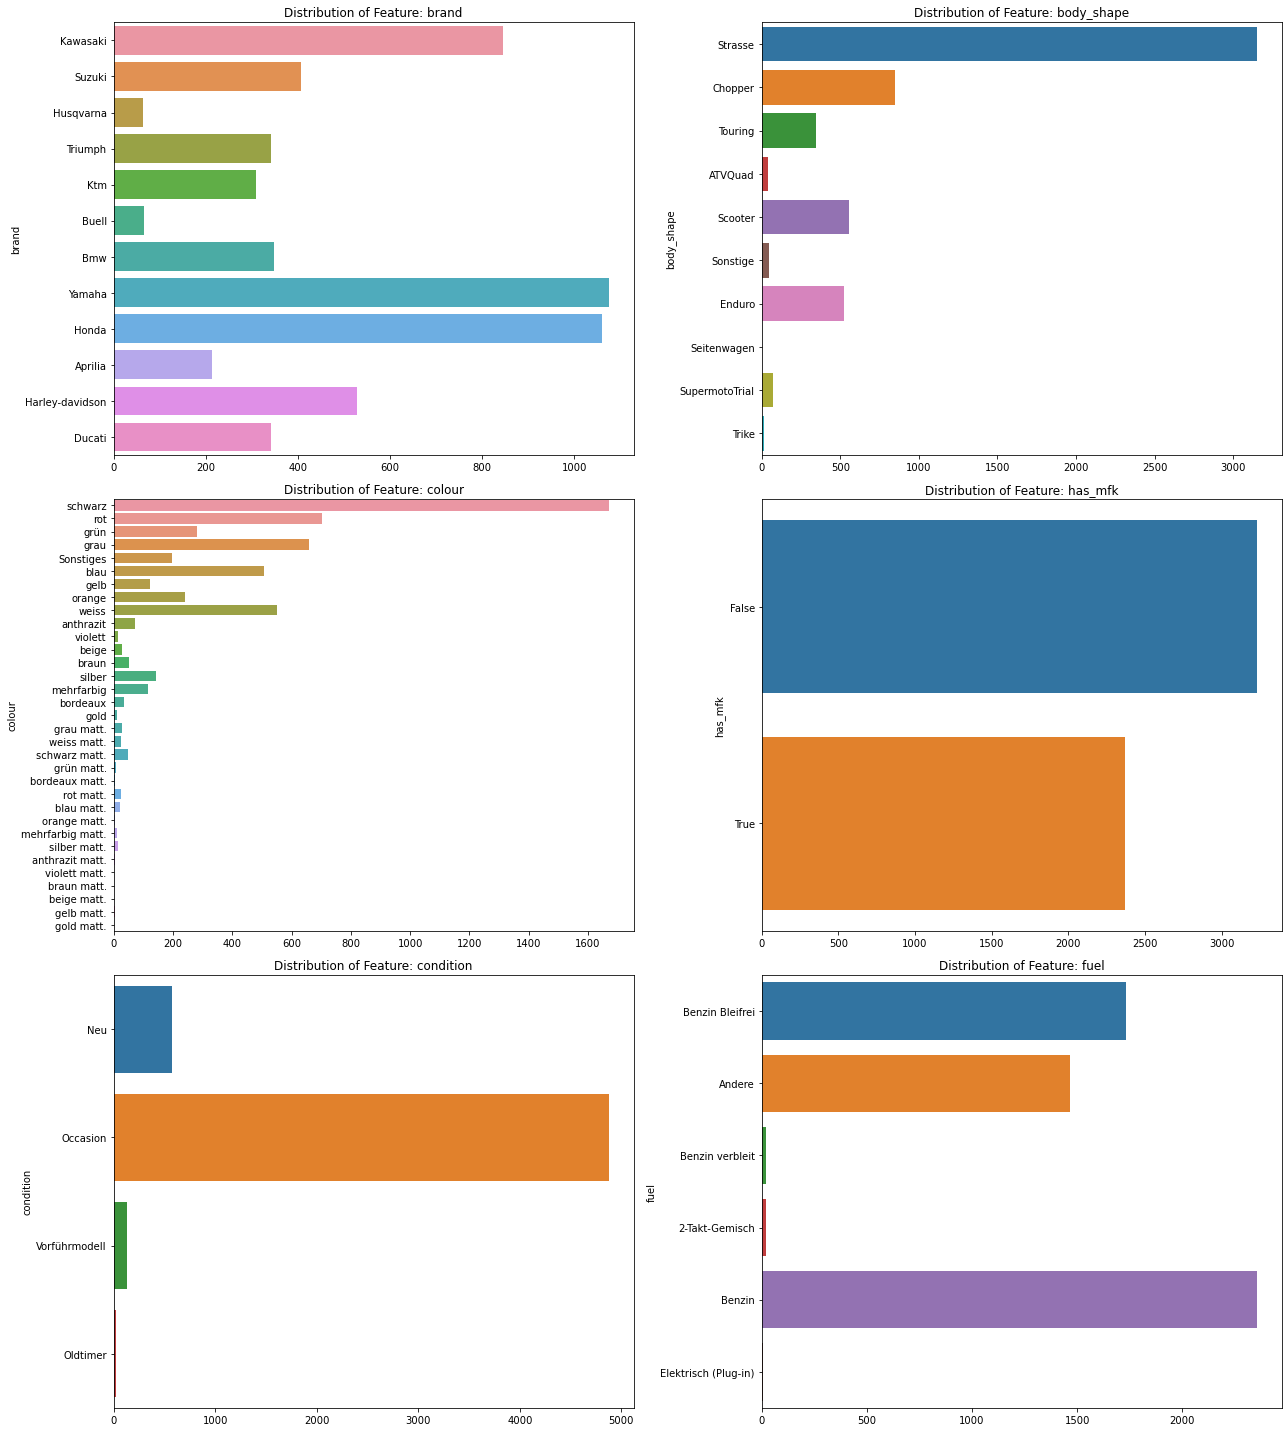

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))
cat_lst = ['brand','body_shape','colour','has_mfk','condition','fuel']
axes = axes.ravel()  # array to 1D
for col, ax in zip(cat_lst, axes):
    sns.countplot(data=moto[[col]], y=col, ax=ax)
    ax.set(title=f'Distribution of Feature: {col}', xlabel=None)   
fig.tight_layout()
plt.show()

#### distribution of numeric data

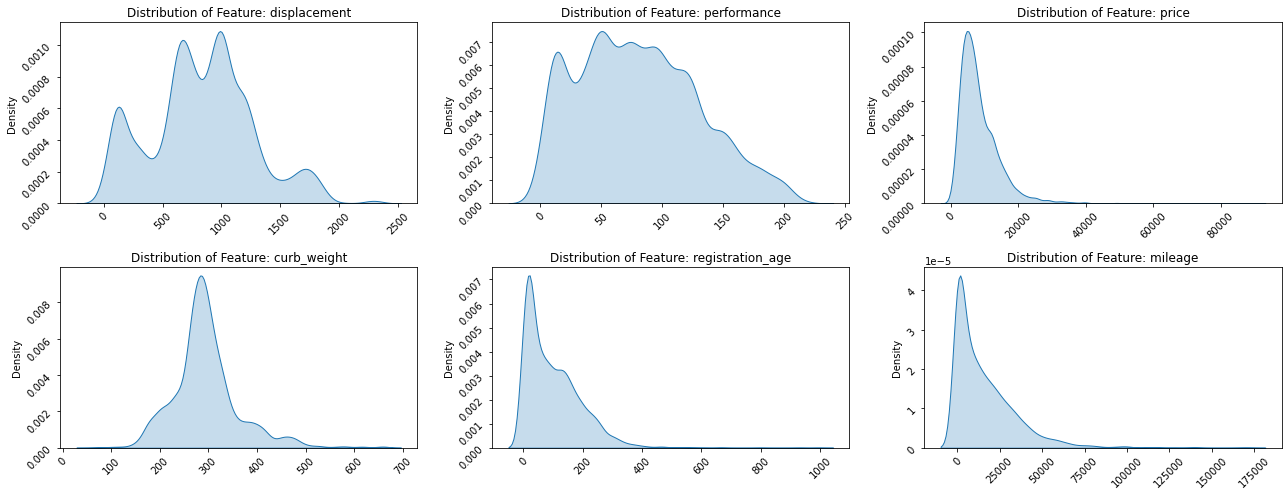

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 7), sharex=False, sharey=False)
num_lst = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']
axes = axes.ravel()  # array to 1D
cols = num_lst  # create a list of dataframe columns to use

for col, ax in zip(num_lst, axes):
    sns.kdeplot(data=moto[[col]], x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Feature: {col}', xlabel=None)
for ax in fig.axes:  # rotate x ticks
    ax.tick_params(labelrotation=45)
fig.tight_layout()
plt.show()

<AxesSubplot:>

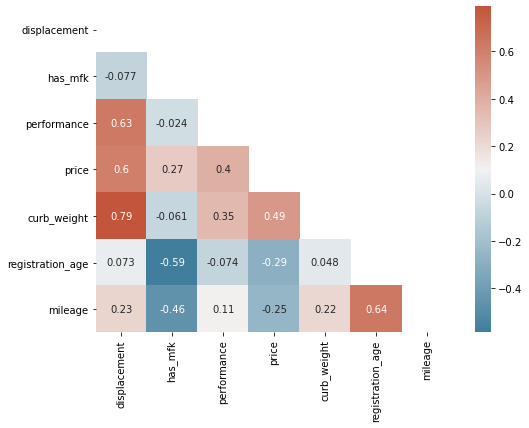

In [14]:
# check the correlation between numeric features. 
corr = moto.corr()
f, ax = plt.subplots(figsize=(8, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

- Categorical features:
    - target attribute 'brand': Yamaha and Honda have the most number, Huskvama and Buell have the least number in the dataset. The labels in brand are imbalanced, this means in the later tasks, I should be careful of the metric selection or do the under- or oversampling.
    
    - Other categorical features are also imbalanced. 
    
- numeric features:
    - right-skewed: price, mileage, registration_age
    - multinomial distribution: displacement and performance
    - displacement have a strong correlation to curb_weight(r = 0.79), moderate correlation to performance (r = 0.63) and price (r=0.6). registration_Age and mileage are moderate correlated (r=0.64).
    


- Our target attribute 'brand' is categorical data with 12 labels. 
- next step: visualize between brand and other features to check if some features are helpful to classify brand labels.

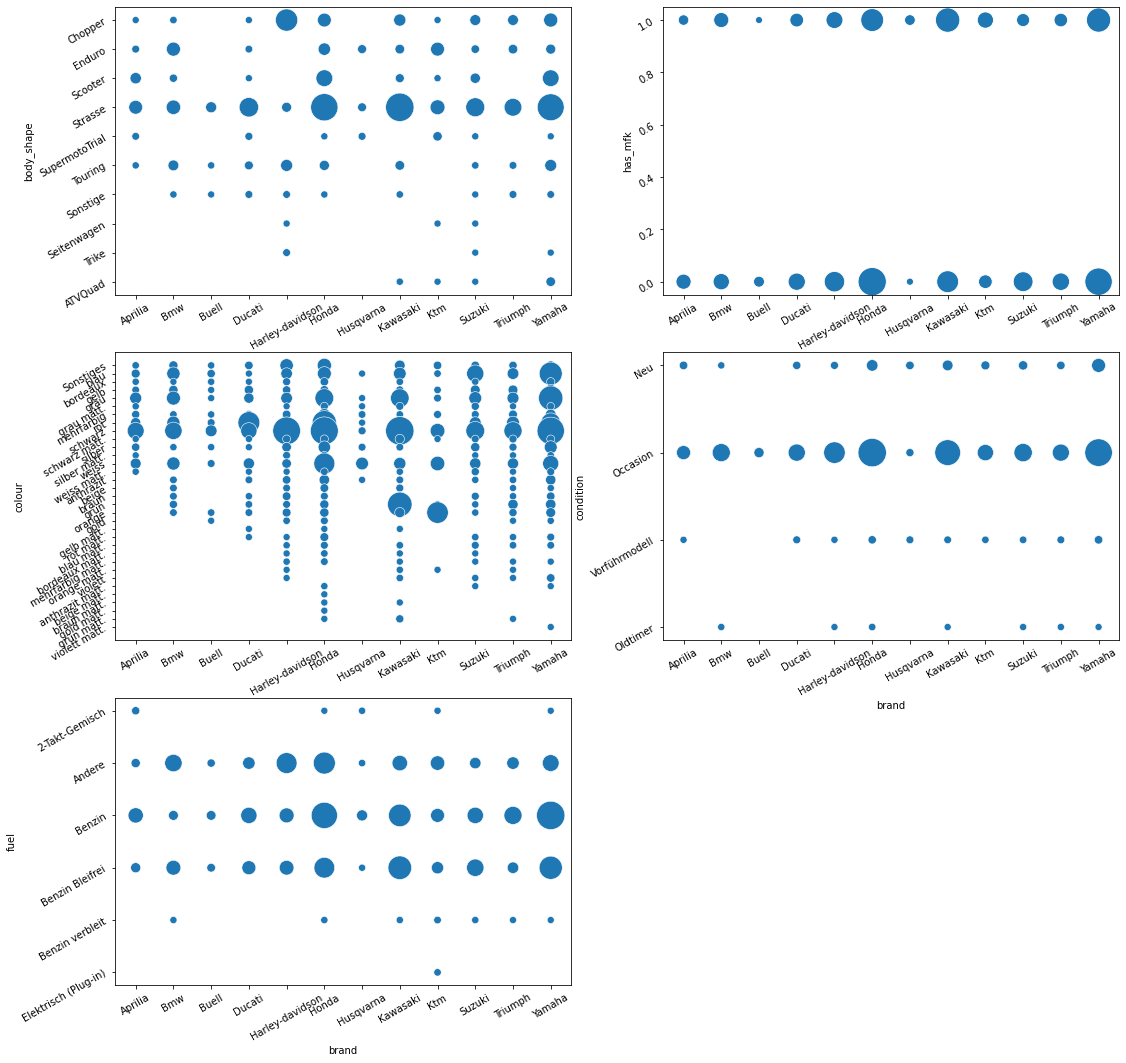

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18), sharex=False, sharey=False)
axes = axes.ravel()
lst = ['body_shape','has_mfk','colour','condition','fuel']  
for i in range(len(lst)):
    new_df = moto.groupby(['brand',lst[i]]).count().reset_index()
    new_df['count'] = new_df.iloc[:,-1]
    sns.scatterplot(data=new_df, x='brand', y=lst[i], size='count', legend=False,sizes=(50, 800),ax=axes[i])
axes[5].set_axis_off()  # delete the empty plot
for ax in fig.axes:  # rotate x ticks
    ax.tick_params(labelrotation=30)

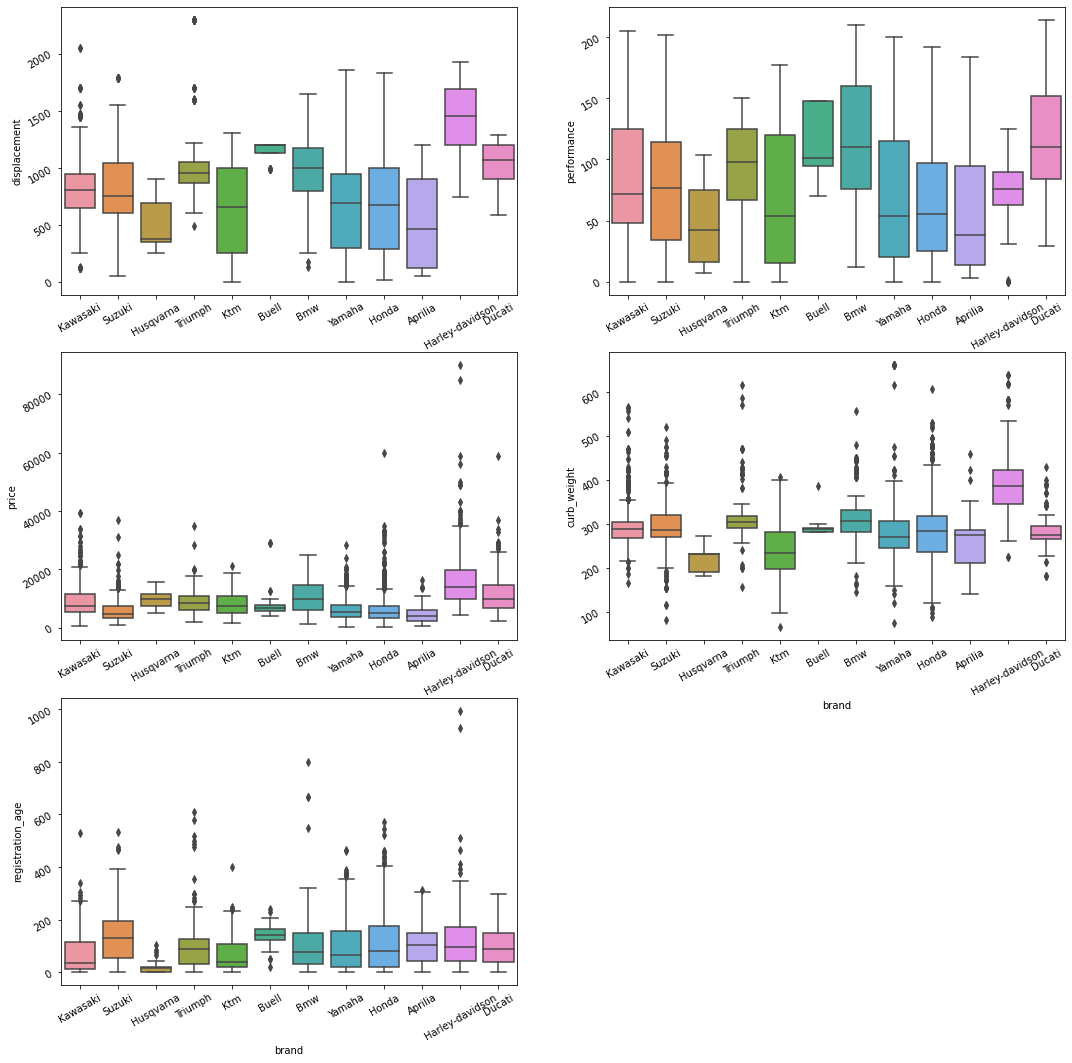

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18), sharex=False, sharey=False)
axes = axes.ravel()
for i in range(len(lst)):
    sns.boxplot(x=moto["brand"], y=moto[num_lst[i]], orient='v', ax=axes[i])
axes[5].set_axis_off()  # delete the empty plot
for ax in fig.axes:  # rotate ticks
    ax.tick_params(labelrotation=30)

YOUR ANSWER HERE
### 1. basic of moto dataset:
    - There are 5619 observations 12 attributes in the moto dataset.
    - 'colour' attribute has 14 NA, 'fuel' attribute has 7 NA. It is not a large number, so I will simply drop the rows which include NA. After drop NA, there are 5598 overservations.

### 2.  the 12 attributes: 
    - 1 boolean type (has_mfk), 
    - 4 float type (displacement, performance, curb_weight, mileage), 
    - 2 integer type (price,registration_age), 
    - 5 categorical type(body_shape, colour,condition,fuel,brand). 
    - The target attribute 'brand' is categorical data, with 12 unique labels.


### 3. categorical attributes vs brand:


    - body_shape: 
        - label 'Strasse' is the mode in this attribute (in the body_shape distribution plot). 
        - Car brand 'Harley-davidson' is the the only brand with the mode of Chopper, all other brands have the mode of 'Strasse'.
        - body_shape attribute could be useful to split the brand 'Harley-davidson' away from the other brands.

    - has_mfk: 
        - all brands have both 'yes' and 'no'. Some have more 'yes', some have more 'no'.
        - the count differences of two labels in each label are not very large. 
        - this feature may be not that helpful to classify brands.

    - colour:
        - brand Ktm has the mode of orange, which is a minority in other brands
        - the second most frequently appeared color of brand Kawasaki is grun, which is also minority in other brands
        - some very rare colors, e.g. only Yamaha has the violett matt colour, only Honda has gold matt,.... 
        - colour attrribute (grun, orange) could be helpful to classify brands. But we should be careful of using the colours with very small number (e.g. gold matt), it may cause low generalization when we use this model to predict the data in reality. 

    - condition:
        - Except Husqvama, all other brands have the most condition of occasion.
        - Though the plot shows that the other three conditions could split the brands. However, these three categories have small number compare to occasion condition. And it is unlikely that in reality the brand Buell only has occasion condition, the brand Aprilia doesn't have oldtimer. So they are the properties of this dataset, but not generally car properties in reality.
        - Using them in classification model may lead low generalization.

    - fuel:
        - similiar to the attribute condition
        - some categories may split the brands in this dataset, but generalize bad in other unknown data.
 
 
### 4. numeric attributes vs brand:


    - displacement, price and curb_weight: 
        - in all three attributes, Harley-davidson has the highest median.
        - some box plots of different brands are not overlapping.
        - the three attributes could be helpful in classifying brands.
    - performance, registration_age:
        - the boxplots of different brands are mostly overlapping. This makes it hard to find out an efficient split condition.
   
   
### 5. I assume the attributes 'body_shape, colour, displacement, price, and curb_weight' will be helpful to classify the brand labels. 

### Aufgabe 2 - Testing / Metrics (4 Punkte)

Unterteile den Datensatz sinnvoll in Trainings- und Testteil. Wir werden von diesen Teilen in sämtlichen kommenden Aufgaben Gebrauch machen.

Als Zielmetrik werden wir über alle kommenden Aufgaben mit dem mittleren F1-Score arbeiten, individuell berechnet über alle Klassen.  
Erörtere, was die Eigenschaften dieser Metrik sind und wann sie sinnvoll ist, wann nicht. Trifft dies hier zu?

In [17]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder 
# split the dataframe moto into training and test dataset.
moto_train = moto.sample(frac=0.8, random_state=184652) # split the data into training and test data: 80% to 20%
moto_test = moto.drop(moto_train.index)

'''In the next task, I will apply logistic regression to predict brand. 
Logistic regression only works with numeric data except the target variable. 
All 5 categorical variables in 'moto' are unordinal. If converting them to integer 1,2,3,...will negatively
affect the machine learning models. 
So here I will 
- convert them to numeric data by one hot encoder.
- split data into training and test dataset, with the ratio of 4:1
- scale data, because some classification models (e.g. MLP) have better performance with scaled data.
'''
## convert categorical features to one-hot numeric array 
# select the features that need to be converted to numbers by OneHotEncoder in one dataframe named moto_s1
cat_lst2 =['body_shape', 'colour', 'condition', 'fuel']  # categorical list without brand
moto_ohe = moto.copy().drop(cat_lst2,axis=1)
for i in range(len(cat_lst2)):
    new = np.array(moto[cat_lst2[i]]).reshape(-1, 1)   # select one cat variable, convert it to numpy array, with a specific shape ?x1
    ohe = OneHotEncoder() 
    new_ohe = ohe.fit_transform(new)   # to OneHotEncoder
    new_cate = ohe.categories_[0]   # the labels of this feature
    n_cate = new_cate.shape[0]   # number of labels
    new_ohe = new_ohe.toarray().reshape(-1,n_cate) # convert to numpy array and reshape, so that each label becomes a new column 
    new_ohe = pd.DataFrame(new_ohe,columns = new_cate) # convert to dataframe type
    moto_ohe = pd.concat([moto_ohe,new_ohe],axis=1)

## split the oneHot encoded dataset into training and test dataset.Using the same index as the splitted data of moto dataframe
df_train = moto_ohe.loc[moto_train.index] # split the data into training and test data: 80% and 20%
df_test = moto_ohe.drop(df_train.index)

X_mototrain = df_train.drop(['brand'],axis=1)  # train input data
y_mototrain = df_train['brand']                 # train output
X_mototest = df_test.drop(['brand'],axis=1)     # test input
y_mototest = df_test['brand']                   # test output

# some of the classification methods require scaled data, e.g. multi-layer-perceptron, knn. 
# So I will scale the data, and use the scaled data for all the coming tasks.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_mototrain)
X_mototrain_sc = scaler.transform(X_mototrain)  # scale train input data, as numpy array
X_mototest_sc = scaler.transform(X_mototest)    # scale test input data, as numpy array
moto_train.shape,moto_test.shape,X_mototrain_sc.shape,y_mototrain.shape,X_mototest_sc.shape,y_mototest.shape

((4478, 12), (1120, 12), (4478, 60), (4478,), (1120, 60), (1120,))

In [18]:
moto_ohe.head(2)

displacement  has_mfk  performance  price  curb_weight  registration_age  \
0         947.0     True        125.0   9890        285.0                 0   
1         947.0     True        125.0   9890        285.0                 0   

   mileage     brand  ATVQuad  Chopper  ...  Neu  Occasion  Oldtimer  \
0      1.0  Kawasaki      0.0      0.0  ...  1.0       0.0       0.0   
1      1.0  Kawasaki      0.0      0.0  ...  1.0       0.0       0.0   

   Vorführmodell  2-Takt-Gemisch  Andere  Benzin  Benzin Bleifrei  \
0            0.0             0.0     0.0     0.0              1.0   
1            0.0             0.0     0.0     0.0              1.0   

   Benzin verbleit  Elektrisch (Plug-in)  
0              0.0                   0.0  
1              0.0                   0.0  

[2 rows x 61 columns]

In [19]:
X_mototrain_sc

array([[-0.12085898, -0.85300847,  0.51151311, ...,  1.49283316,
        -0.05988185, -0.02990074],
       [ 0.38863233,  1.1723213 ,  2.25547042, ..., -0.66986722,
        -0.05988185, -0.02990074],
       [-0.42055975,  1.1723213 , -0.25907268, ...,  1.49283316,
        -0.05988185, -0.02990074],
       ...,
       [-0.13469132, -0.85300847, -0.66464414, ..., -0.66986722,
        -0.05988185, -0.02990074],
       [ 0.38632694,  1.1723213 ,  1.70794894, ..., -0.66986722,
        -0.05988185, -0.02990074],
       [-0.76867372, -0.85300847, -1.09049419, ...,  1.49283316,
        -0.05988185, -0.02990074]])

In [20]:
y_mototrain

1743      Yamaha
2206       Honda
476     Kawasaki
947          Ktm
3758      Yamaha
          ...   
4595       Honda
4618       Honda
291     Kawasaki
1205         Bmw
7       Kawasaki
Name: brand, Length: 4478, dtype: object

YOUR ANSWER HERE

- F1-score is a metric to evaluate the accuracy of classification models. It is the weighted average of precision and recall. 

\begin{equation}
precision = \frac{TruePositive}{TruePositive + FalsePositive}
\end{equation}


\begin{equation}
recall = \frac{TruePositive}{TruePositive + FalseNegative}
\end{equation}
\begin{equation}
F1 score =  \frac{2 \cdot precision \cdot recall}{precision + recall} = \frac{2\cdot TruePositive}{2\cdot TruePositive + FalsePositive + FalseNegative}
\end{equation}

- A normal accuracy is the number of correctly classified data divided by the total number of predictions. 


\begin{equation}
accuracy =  \frac{TruePositive + TrueNegative}{Number Of Predictions}
\end{equation}




- When the labels are balanced and there is no major downside to predict false negatives, both accuracy and F1-score work good, people often use accuracy because it is easier to interpret.

- When the classes are highly imbalanced (suitable for most of the real-life problems) and there is a serious downside to predicting false negatives, then F1 score will provide a better assessment of model performance, because it takes into account how the data is distributed and will penalize models that have too many false negatives.

- For multi-label classification, we need to average the F1-score of all classes. There are different ways to do it:

   - 'micro'(calculate metrics globally by counting the total true positives, false negatives and false positives)
   - 'macro'(calculate metrics for each label, find the unweighted mean. It does not take label imbalance into account)
   - 'weighted'(calculate metrics for each label, find the average weighted mean by the number of true instances for each label.It takes label imbalance into account.)  
    
- In the dataset moto, the target attribute 'brand' has imbalanced labels, so F1-score will be a better metric.

### Aufgabe 3 - Logistic Regression (5 Punkte)

Als 'Baseline'-Modell verwenden wir logistische Regression.  

Setze einen einfachen regularisierten, rein linearen logistischen Regressionsansatz um. Verwende dazu scikit-learn.  

Evaluiere und diskutiere das Modell auf dem Testdatensatz. Zeichne die Confusion Matrix und berechne die Zielmetrik. 

In [21]:
# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

def lr_model(C_lst,slv,pnlt,train_X,true_y_tr,test_X,true_y_te):  
    '''
    slv:solver
    pnlt:penalty
    C_lst: a list of regularization strength parameter C; smaller C specify stronger regularization
    train_X,train_y,test_X,test_y: data
    
    Output
    -------
    f1-score of train and test set
    confusion matrix
    
    '''    
    label_lst = df_test['brand'].unique()   # extract the labels, have double-checked that it is the same sequence as the classification report 
    fig, axes = plt.subplots(nrows=len(C_lst), ncols=2, figsize=(14,48))
    for i in range(len(C_lst)):
        lr = LogisticRegression(multi_class='multinomial', C=C_lst[i], solver=slv, penalty = pnlt,max_iter=10000)
        lr_fit = lr.fit(train_X,true_y_tr) # train model by training dataset
        
        pred_y_tr = lr_fit.predict(train_X)  # predict training data by the model 
        pred_y_te = lr_fit.predict(test_X)  # predict test data by the model
        
        f1_train = f1_score(true_y_tr, pred_y_tr, average='weighted', labels=label_lst)
        f1_test = f1_score(true_y_te, pred_y_te, average='weighted', labels=label_lst)
        print('C = {}: f1-score of train set is {:.3f}, f1-score of test set is {:.3f}'.format(C_lst[i],f1_train,f1_test))
        
        # display confusion matrix

        f1_lst = [f1_train,f1_test]
        true_lst = [true_y_tr,true_y_te]
        pred_lst = [pred_y_tr,pred_y_te]

        for j in range(2):
            true_y = true_lst[j]
            pred_y = pred_lst[j]          
            cfmx = confusion_matrix(true_y, pred_y, labels=label_lst) 
            ConfusionMatrixDisplay(confusion_matrix=cfmx,display_labels=label_lst).plot(ax=axes[i,j])    
        axes[i,0].set_title("train set, (C = {}, f1-score = {:.3f})".format(C_lst[i],f1_lst[0]))
        axes[i,1].set_title("test set, (C = {},f1-score = {:.3f})".format(C_lst[i],f1_lst[1])) 
    for ax in fig.axes:  # rotate ticks
        ax.tick_params(labelrotation=60)     

#### L2 regularization by 'lbfgs'

C = 0.01: f1-score of train set is 0.422, f1-score of test set is 0.424
C = 0.1: f1-score of train set is 0.467, f1-score of test set is 0.440
C = 1: f1-score of train set is 0.475, f1-score of test set is 0.447
C = 10: f1-score of train set is 0.475, f1-score of test set is 0.449
C = 100: f1-score of train set is 0.475, f1-score of test set is 0.450
C = 1000: f1-score of train set is 0.475, f1-score of test set is 0.450


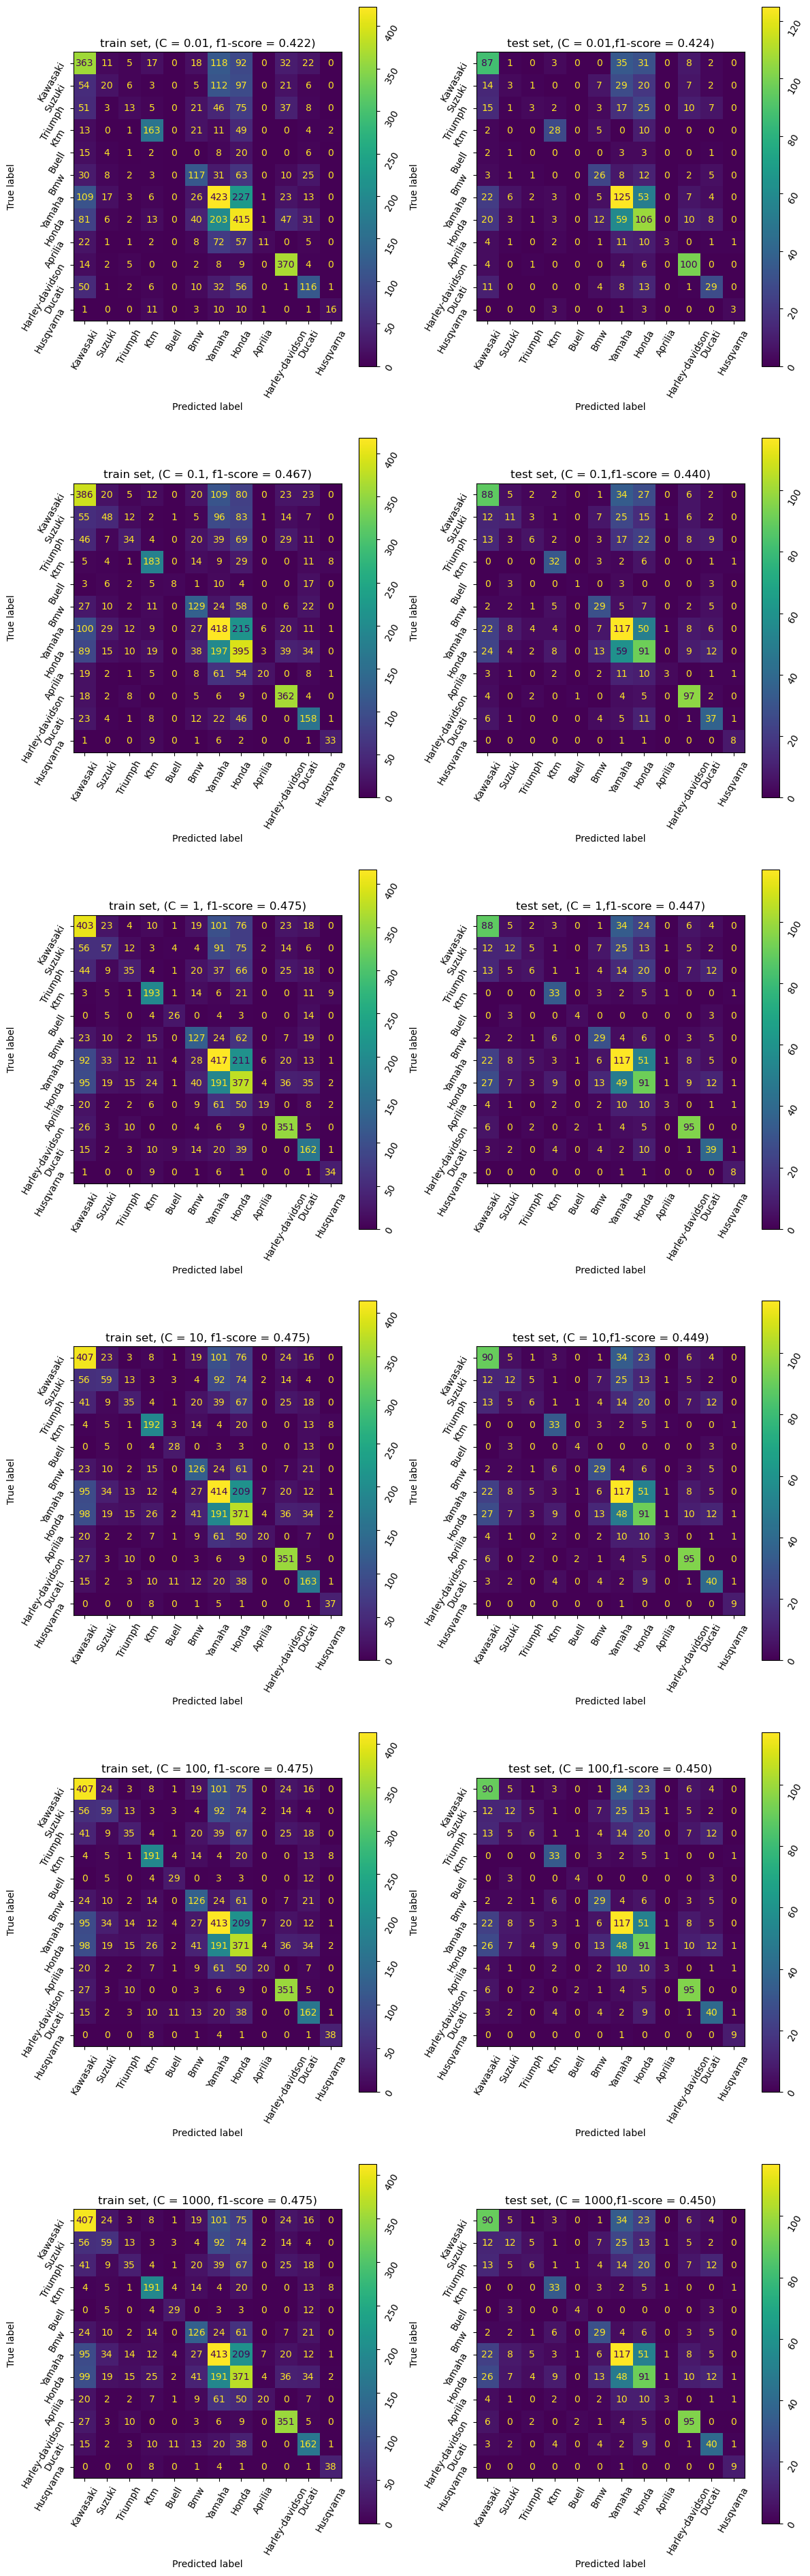

In [18]:
C_lst = [0.01,0.1,1,10,100,1000]

lr_model(C_lst,'lbfgs','l2',X_mototrain_sc,y_mototrain,X_mototest_sc,y_mototest)

In [46]:
# check if labels are right, use label Bmw as an example
print('there are {} Bmw labels in test dataset.'.format(len(y_mototest[y_mototest == 'Bmw']))) 
print('there are {} Bmw true labels count from confusion matrix of test set.'.format(np.sum([3,1,1,26,8,12,2,5])))
print('Labels are correct')

there are 58 Bmw labels in test dataset.
there are 58 Bmw true labels count from confusion matrix of test set.
Labels are correct


#### L2 regularization by 'saga' solver

C = 0.01: f1-score of train set is 0.422, f1-score of test set is 0.424
C = 0.1: f1-score of train set is 0.467, f1-score of test set is 0.439
C = 1: f1-score of train set is 0.474, f1-score of test set is 0.446
C = 10: f1-score of train set is 0.475, f1-score of test set is 0.449
C = 100: f1-score of train set is 0.475, f1-score of test set is 0.449
C = 1000: f1-score of train set is 0.475, f1-score of test set is 0.449


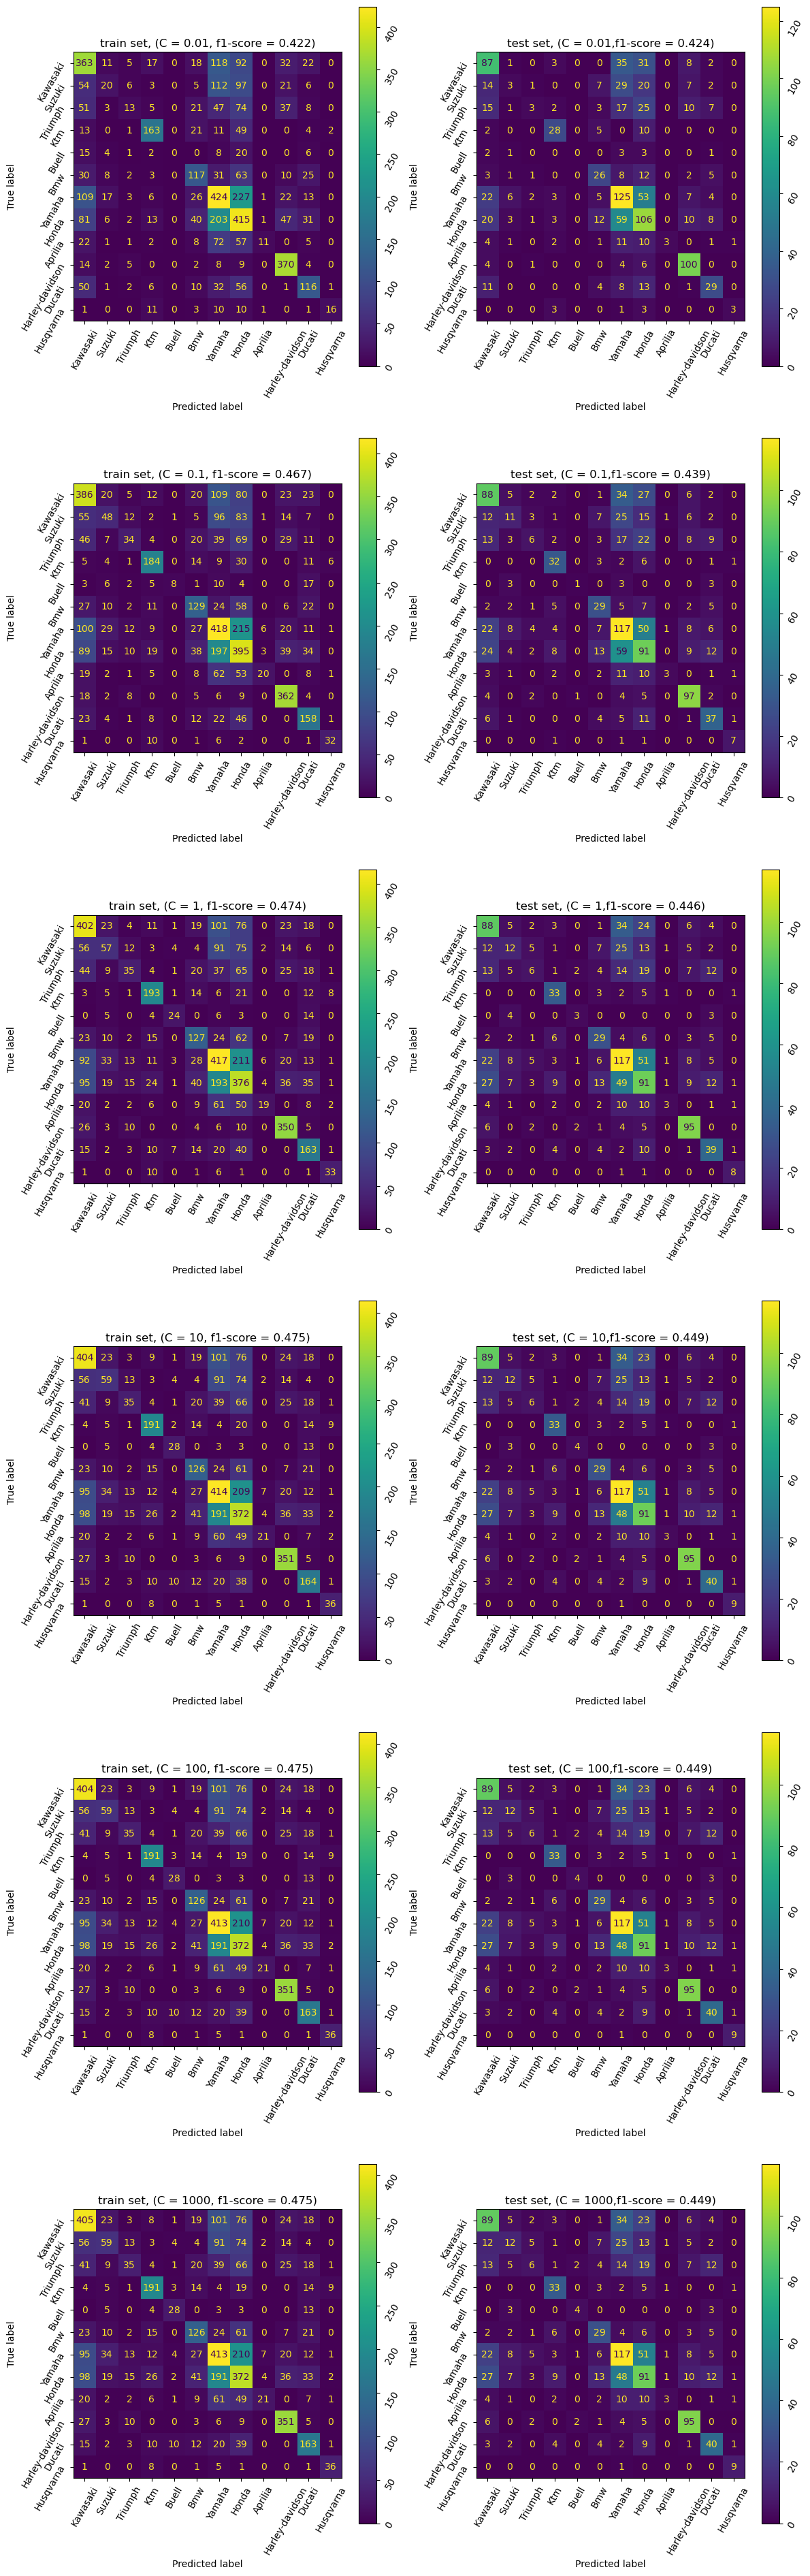

In [20]:
lr_model(C_lst,'saga','l2',X_mototrain_sc,y_mototrain,X_mototest_sc,y_mototest)

#### L1 regularization by 'saga' solver

C = 0.01: f1-score of train set is 0.366, f1-score of test set is 0.374
C = 0.1: f1-score of train set is 0.454, f1-score of test set is 0.427
C = 1: f1-score of train set is 0.474, f1-score of test set is 0.449
C = 10: f1-score of train set is 0.475, f1-score of test set is 0.449
C = 100: f1-score of train set is 0.475, f1-score of test set is 0.449
C = 1000: f1-score of train set is 0.475, f1-score of test set is 0.449


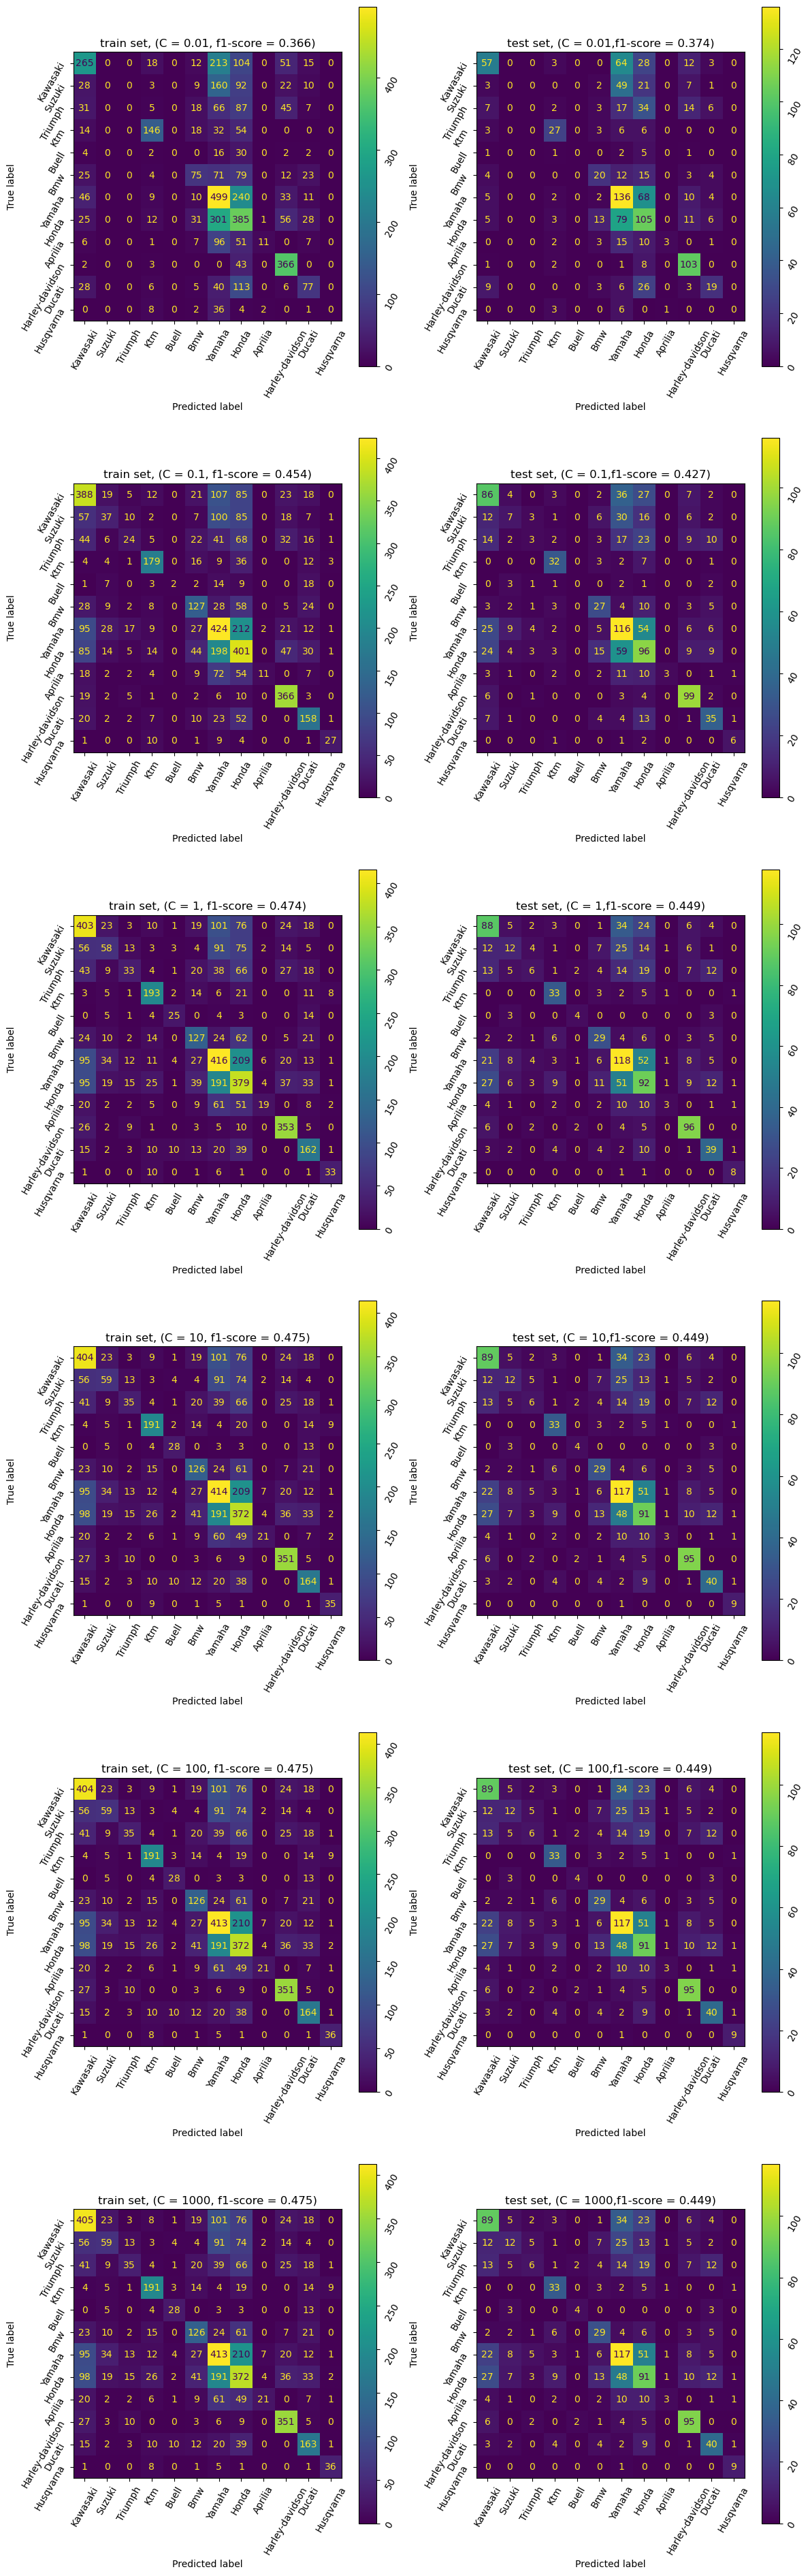

In [21]:
lr_model(C_lst,'saga','l1',X_mototrain_sc,y_mototrain,X_mototest_sc,y_mototest)

### optimal logistic regression model 
- All models have f1-scores under 0.5. I will select one of them to represent the result of logistic regression on moto dataset.

- C = 1, solver = 'saga', with 'l1' regularization: f1-score of train set is 0.474, f1-score of test set is 0.448

C = 1: f1-score of train set is 0.474, f1-score of test set is 0.448


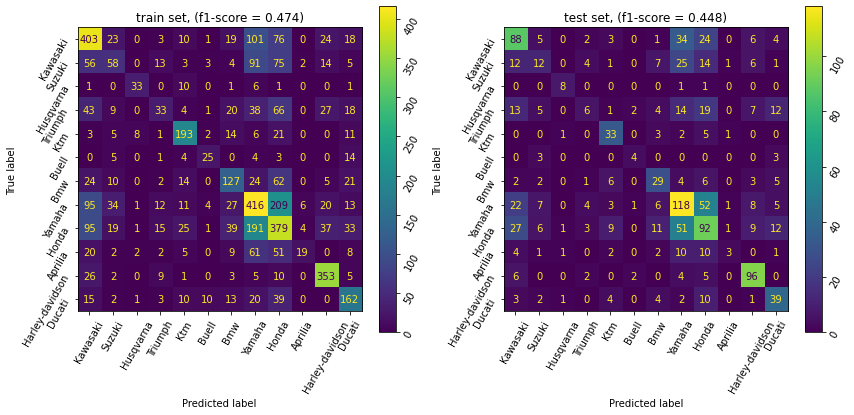

In [38]:
def cfmx_two(X_train,X_test,y_train,y_test,model,label_lst):
    '''display confusion matrix of train and test set'''
    fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=(14,6))

    # train set
    cfmx_train = confusion_matrix(y_train, model.predict(X_train), labels=label_lst) 
    ConfusionMatrixDisplay(confusion_matrix=cfmx_train,display_labels=label_lst).plot(ax=axes[0])    
    axes[0].set_title("train set, (f1-score = {:.3f})".format(f1_score(y_train,model.predict(X_train),average='weighted')))
    # test set
    cfmx_test = confusion_matrix(y_test, model.predict(X_test), labels=label_lst) 
    ConfusionMatrixDisplay(confusion_matrix=cfmx_test,display_labels=label_lst).plot(ax=axes[1])  
    axes[1].set_title("test set, (f1-score = {:.3f})".format(f1_score(y_test,model.predict(X_test),average='weighted'))) 
    for ax in fig.axes:  # rotate ticks
        ax.tick_params(labelrotation=60)  

        
label_lst = moto['brand'].unique() 
lr = LogisticRegression(multi_class='multinomial', C=1, solver='saga', penalty = 'l1',max_iter=10000)
lr.fit(X_mototrain_sc,y_mototrain)
f1_train = f1_score(y_mototrain, lr.predict(X_mototrain_sc), average='weighted', labels=label_lst)
f1_test = f1_score(y_mototest, lr.predict(X_mototest_sc), average='weighted', labels=label_lst)
print('C = {}: f1-score of train set is {:.3f}, f1-score of test set is {:.3f}'.format(1,f1_train,f1_test))

cfmx_two(X_mototrain_sc,X_mototest_sc,y_mototrain,y_mototest,lr,label_lst)

YOUR ANSWER HERE

#### Interpretation of multiclass confusion matrix:  
   - take 'Bmw' in confusion matrix of test dataset with C = 0.01 as an example (the second confusion matrix in first row).
    - True positive: 30 (number at diagonal) 
    - False negative: 28, by adding up row 'Bmw'(58) minus true-positive (30)
    - False positive: 34, by adding up column 'pred_Bmw'(64) minus true-positive (30)
    - True negative: sum up all the rest number in confusion matrix.

### Evaluation of logistic model by metric f1-score


   - I have used both Regularization types 'l1'(lasso) or 'l2'(ridge), and different Regularization strength factor C (positive float number) to find the optimal model by f1-score.
      - L1 regularization adds the 'absolute value of magnitude of the coefficient' as penalty to the loss function. It reduces the model complexity by limiting the model using only a few features.
      - L2 regularization adds the 'square of magnitude of the coefficient' as penalty to the loss function. It reduces the model complexity by trying to find the coefficients which are close to zero.
      - A larger C value corresponds to less regularization, which means logistic regression will try to fit training set as good as possible. It may cause overfitting.
      - With low C value, logistic regression model will try to use less features (L1) or find coefficients that are close to zero (L2). The model regularization will be improved, but the model may be underfitting.
      
   
   - Result of logistic models
       - All of my logistic regression models have f1-score under 0.5, which are not good.
           - the optimal model is C =1, saga with l1 regularization, f1-score on train set is 0.474, on test set is 0.449.
       - Reasons could be:
           - In the 60 input features there are many irrelevant features. 
           - the target feature has no linear correlation with the input features, in such case, logistic regression can't predict the targets good.
       - solutions to improve logistic regression:
           - use feature selection (forward, backward, or step-wise) to reduce the irrelevant features.
           - use principal components analysis or Non-negative matrix factorization to reduce the data dimension, where only n selected components will be used in modeling. 
               - If the result is still bad, should try other classification methods.


### Aufgabe 4 - Multi-Layer Perceptron (15 Punkte)

Implementiere ein Multi-Layer Perceptron mit sigmoider Aktivierungsfunktion und $l_2$-Regularisierung durch Ergänzen der folgenden Klasse.  

Zeige mit Hilfe des kleinen Entwicklungsdatensatzes `dev_data.csv`, dass die Umsetzung des Gradienten korrekt ist unter Verwendung der Methode `grad_check()`. 
Erkläre, was `grad_check` macht.

Zeige weiter, dass

- Gradient Descent konvergiert.
- eine Accuracy > 0.8 erzielt werden kann.
- die Regularisierung den gewünschten Effekt hat.

Verwende aus der Library `mlxtend.plotting` die Funktion `plot_decision_regions` zum Zeichnen der Decision Regions und der Decision Boundary.  
Bechreibe den Plot.  

Ermögliche weiter die Verwendung der Bibliotheksfunktion `scipy.optimize.minimize` zur Optimierung der Modell-Koeffizenten $\theta$.  
Zeige, dass auch das funktioniert. Zeichne insbesondere den Verlauf der Kostenfunktion über das Iterationsverfahren hinweg, wenn du den Solver `L-BFGS-B` verwendest.

In [22]:
import numpy as np
import sys

from mlxtend.plotting import plot_decision_regions
import scipy
from scipy.optimize import minimize

class MLP(object):
    ''' A Multi-Layer Perceptron.
    '''

    def __init__(self, layers, weight_init_int=(-.7, .7), method='fullbatch',
            max_iter=1000, learning_rate=0.3, dlr=0.1, alpha=0., epsilon=0.01,
            minimethod='CG', batchsize=30):
        '''
        layers: tuple
            The elements of the tuple define the number of units in all hidden
            layers (bias units not included), i.e. a tuple (20, 30, 40) defines
            a MLP with three hidden layers of 20, 30 and 40 hidden units plus
            bias units.

        weight_init_int: tuple =(-.7, .7)
            The interval on which the weights/thetas will be randomly initialized.

        alpha: float
            The l2 regularization strength.

        method: string
            'fullbatch', 'minibatch', 'sgd', 'minimize'

        epsilon: float
            The threshold value for the length of the gradient for stopping gradient
            descent iterations.
            
        learning_rate: float
            The (initial) step size.
            
        max_iter: int
            The maximal number of gradient descent iterations.
            
        dlr: float
            The adaptive learning rate constant d.
            
        batchsize: int
            The number of samples in batch when using the minibatch method for optimizing.
            
        minimethod: string
            The algorithm used by the minimize library function for optimizing the
            model coefficients / thetas / weights. (use 'CG' or 'L-BFGS-B')
        '''
        # the model
        self.layers = layers
        self.weight_init_int = weight_init_int
        self.alpha = alpha
        # basic gradient decscent params
        self.method = method
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        # batched gradient descent
        self.dlr = dlr
        self.batchsize = batchsize
        # when using scipy.optimize.minimize
        self.minimethod = minimethod

        print('MLP(layers={}, weight_init={}, method="{}", alpha={}, learning_rate={}, dlr={})'.format(
            self.layers, self.weight_init_int, self.method, self.alpha, self.learning_rate, self.dlr))
    
    def fit(self, X, y):
        '''
        Configures input and output layer, initializes weights and fits the
        model coefficients.
        '''
        # initialize the entire network, including input and ouput layer
        self.X = X
        self.y = y
        self.y_ = self._init_network(X, y)  # onehot encoded categories
        
        if self.method == 'fullbatch':
            # YOUR CODE HERE
            # In one iteration: average the gradients of all samples, update thetas for the next iteration 
            self.cost_epoch = []
            self.grad_iter = []
            for j in range(self.max_iter):
                self.grad_ur = []
                for i in range(len(self.X)): # for one single data point
                    self.grad_ur.append(MLP.gradient_cost_function(self.thetas, self.alpha, self.X[i], self.y_[i], self._theta_shapes)) # 1-d
                self.grad_avg_ur = np.average(self.grad_ur,axis=0)  # result is a numpy array. mean of all data points
                self.thetas_ur = MLP.unroll(self.thetas)
                self.thetas_ur = self.thetas_ur - self.grad_avg_ur*self.learning_rate # updata thetas by new average gradients
                self.thetas = MLP.rollup(self.thetas_ur,self._theta_shapes)
                self.curr_cost = MLP.cost_function(self.thetas,self.alpha,self.X,self.y_,self._theta_shapes)
                self.cost_epoch.append(self.curr_cost)
                self.grad_iter.append(self.grad_avg_ur)
                if abs(self.curr_cost) <= self.epsilon:
                    break
        
        elif self.method == 'sgd':
            # YOUR CODE HERE
            # In one iteration: calculate gradient of one sample, update the thetas, calculate next sample gradient, updata thetas....
            self.cost_epoch = []
            self.grad_iter = []
            for j in range(self.max_iter):
                for i in range((self.X).shape[0]):   # for one single data point
                     #= MLP.gradient_cost_function(self.thetas, self.alpha, self.X[i], self.y_[i], self._theta_shapes)   
                    self.grad_ur = MLP.gradient_cost_function(self.thetas, self.alpha, self.X[i], self.y_[i], self._theta_shapes) # 1-d                  
                    self.thetas_ur = MLP.unroll(self.thetas)
                    self.thetas_ur = self.thetas_ur - self.grad_ur*self.learning_rate
                    self.thetas = MLP.rollup(self.thetas_ur,self._theta_shapes)
                #self.thetas = MLP.rollup(self.thetas_ur,self._theta_shapes)  # rolled up thetas
                self.curr_cost = MLP.cost_function(self.thetas,self.alpha,self.X,self.y_,self._theta_shapes)
                self.cost_epoch.append(self.curr_cost)
                self.grad_iter.append(self.grad_ur)
                if abs(self.curr_cost) <= self.epsilon:
                    break

        elif self.method == 'minibatch':
            # YOUR CODE HERE
            # between sgd and fullbatch: split sample to n batches. In each iteration: start from batch 1,calculate mean gradients of all samples 
            # in this minibatch, update the thetas, calculate mean gradients of next minibatches,....
            
            self.cost_epoch = []
            self.grad_iter = []
            if len(self.X)/self.batchsize == len(self.X)//self.batchsize:
                n_batch = int(len(self.X)/self.batchsize)   # number of mini batches
            elif len(self.X)/self.batchsize > len(self.X)//self.batchsize:
                n_batch = int(len(self.X)//self.batchsize + 1)    # number of mini batches

            for j in range(self.max_iter):
                for k in range(n_batch):
                    if k == n_batch - 1:   # the last batch may have less data points
                        self.X_n = self.X[self.batchsize*k :]
                        self.y_n = self.y_[self.batchsize*k :]
                    else: 
                        self.X_n = self.X[self.batchsize*k : self.batchsize*(k+1)]
                        self.y_n = self.y_[self.batchsize*k : self.batchsize*(k+1)]
                    grad_ur = []
                    for i in range(len(self.X_n)):
                        grad_ur.append(MLP.gradient_cost_function(self.thetas, self.alpha, self.X_n[i], self.y_n[i], self._theta_shapes))
                    self.grad_avg_ur = np.average(grad_ur,axis=0)
                    self.thetas_ur = MLP.unroll(self.thetas)
                    self.thetas_ur = self.thetas_ur - self.grad_avg_ur*self.learning_rate # updata thetas by new average gradients
                    self.thetas = MLP.rollup(self.thetas_ur,self._theta_shapes)
                    
                self.curr_cost = MLP.cost_function(self.thetas,self.alpha,self.X,self.y_,self.theta_shapes)
                self.cost_epoch.append(self.curr_cost)
                self.grad_iter.append(self.grad_avg_ur)
                if abs(self.curr_cost) <= self.epsilon:
                    break
                            

        elif self.method == 'minimize':
            # YOUR CODE HERE
            self.thetas_ur = MLP.unroll(self.thetas)
            cost_fun = MLP.cost_function(self.thetas, self.alpha, self.X, self.y, self._theta_shapes)            
            scipy.optimize.minimize(cost_fun, self.thetas, args = (self.alpha, self.X, self.y, self._theta_shapes),method='L-BFGS-B')#, options={'eps': 1e-08,  'maxiter': self.max_iter})

        return self.grad_iter,self.cost_epoch  

    
    @staticmethod
    def cost_function(theta_, alpha, X, y, theta_shapes=None):
        '''Computes the cross-entropy cost function.

        Uses MLP.forward_propagation

        Arguments
        ---------
        theta_ : the weights of the neural network
        alpha : the regularization strength
        X, y : the data
        theta_shapes : a list of tuples defining the shapes of theta

        Returns
        -------
        J : cost function value given thetas

        '''
        # Implementation Hint:
        # Use np.nan_to_num to ensure numpy handles values very close to zero
        # correctly in the log function

        # YOUR CODE HERE
        total_loss = 0   # add up the loss of all data points
        for i in range(len(X)):    # for each data point   
            a_ = MLP.forward_propagation(theta_, X[i])   # a_: all units activations of the i-th data point
            ypred = np.nan_to_num(a_[-1])   # predicted y values of the i-th data point
            ytrue = np.nan_to_num(y[i])
            # for multi-class, the loss of i-th data point is the sum of binary cross entropy
            loss = np.sum(ytrue*np.log(ypred) + (1-ytrue)*np.log(1-ypred))  # cross entropy cost of the i-th sample           
            
            # add the loss to the total_loss
            total_loss += loss 
        l2_reg_cost = alpha/(2*len(X))*np.sum((MLP.unroll(theta_))**2) # L2 regularization cost: all thetas in all layers
        J = -1/len(X)*total_loss + l2_reg_cost   # cross-entropy cost function
        return J  

    @staticmethod
    def gradient_cost_function(theta_, alpha, x, y, theta_shapes=None):
        '''Computes the gradient of the cost function.

        Arguments
        ---------
        theta_ : the weights of the neural network
        theta_shapes : a list of tuples defining the shapes of theta
        alpha : the regularization strength
        x, y : the data

        If theta_shapes is provided (i.e. not None) the thetas are received as
        a 1-d array and rolled-up first. The gradient is then computed. After
        that, if rolled-up initially, the gradient is unrolled again, e.g. for
        further use in an optimizer.

        Returns
        -------
        grad : the gradient of the cost function
        '''
        # YOUR CODE HERE
        x = x.reshape(1,-1)
        # for a single data point, y: one-encoded 
        if theta_shapes != None and MLP.iserror(MLP.rollup, theta_, theta_shapes)==False:  # shapes not none and thetas is 1-d
            init_rollup_status = False
            theta = MLP.rollup(theta_,theta_shapes)
        else: 
            init_rollup_status = True  # theta is rolled up 
            theta = theta_
            
        actv = MLP.forward_propagation(theta, x)  # activations of one data point
        part_J_to_y = - y/actv[-1] + (1-y)/(1-actv[-1])   # partial derivative of cross-entropy cost to the output layer, 1xn, n:unique categories
        grad = [[]]*len(theta)
        part_J_to_actv = part_J_to_y.copy()  # initially partial derivative of cost to an activation layer = J to output layer
        for i in reversed(range(len(theta))):  # we start from the last array in theta
            if i > 0:
                grad_theta_i = actv[i-1].T @ (part_J_to_actv *MLP.phi(actv[i-1]@theta[i])*(1-MLP.phi(actv[i-1]@theta[i]))) # gradient of theta[i]
                grad_actv_i_1 =(part_J_to_actv * (MLP.phi(actv[i-1]@theta[i])*(1-MLP.phi(actv[i-1]@theta[i]))))@(theta[i].T)# gradient of activation layer[i-1]            if i == 0:
            if i == 0:    
                grad_theta_i = x.T @ (part_J_to_actv *MLP.phi(x@theta[i])*(1-MLP.phi(x@theta[i])))
                
            grad[i] = grad_theta_i + 2*alpha*theta[i]  # gradient of the theta[i]
            part_J_to_actv = grad_actv_i_1.copy()   # update for next layer                                        
        
        if init_rollup_status == True:
            grad = MLP.unroll(grad)
        return grad

    @staticmethod
    def forward_propagation(theta, x):
        '''Computes the activations for all units in an MLP given by theta for
        a single data point x.

        Returns
        -------
        a : activations of all units as a list of arrays
        '''
        # YOUR CODE HERE
        input_array = x.reshape(1,-1).copy()         # initial input is x (1-D array)
        a = []
        for i in range(len(theta)):
            new_input = MLP.phi(input_array@theta[i])   # activation of hidden layer 1, 2, ... output
            a.append(new_input.reshape(1,-1))   
            input_array = new_input.copy() # the new activation will be the input for the next layer
        return a 

    @staticmethod
    def back_propagation(theta, a, y):
        '''Computes the error d for all units.

        Returns
        -------
        d : the error (small delta) propagated back through the network as list
        of arrays.
        '''
        # YOUR CODE HERE
        # for a single data point, y is the true value of a single data point, a is the activations of a single data point
        
        d = [[]]*len(theta)
        for j in range(len(theta)): 
            i = len(theta)-1-j  # start from the final layer
            if i == len(theta)-1 :   # the output layer
                d[i] = y - a[i]
            else:
                d[i] = a[i]*(1 - a[i])*(d[i+1]@(theta[i+1].T))   # error of hidden layer i 
        return d

    def grad_check(self, X, y, epsilon=0.0001, decimal=3, verbose=False):
        '''Compare the gradient with finite differences around current point
        in parameter space.
        '''
        if not 'theta' in dir(self):
            _ = self._init_network(X, y)
            
        theta_ur = MLP.unroll(self.theta)

        # approximate the gradient with finite differences
        approxgrad = []
        for idx in range(len(theta_ur)):
            # modify theta[idx] +/- epsilon
            tplus = theta_ur.copy()
            tplus[idx] = tplus[idx]+epsilon
            tplus_rp = MLP.rollup(tplus,self._theta_shapes)  # rollup for cost_function
            tminus = theta_ur.copy()
            tminus[idx] = tminus[idx]-epsilon
            tminus_rp = MLP.rollup(tminus,self._theta_shapes)    # rollup for cost_function          
            # calculate the costfunctions
            minuseps = MLP.cost_function(tminus_rp, self.alpha, self.X, self.y, self._theta_shapes)
            pluseps = MLP.cost_function(tplus_rp, self.alpha, X, y, self._theta_shapes)
            # unroll tplus and tminus again
            tplus = MLP.unroll(tplus_rp)
            tminus = MLP.unroll(tminus_rp)
            
            # finite diffs
            approxgrad.append((pluseps - minuseps)/(2*epsilon))

        approxgrad = np.array(approxgrad)

        # compare normalized gradients
        approxgrad /= np.linalg.norm(approxgrad)  
        
        grad_ = []
        for i in range(len(self.X)):
            grad_.append(MLP.gradient_cost_function(self.theta, self.alpha, self.X[i], self.y[i], self._theta_shapes)) 
        calcgrad = np.average(grad_,axis=0)
        # compare normalized gradients
        calcgrad /= np.linalg.norm(calcgrad)

        if verbose:
            print('approx : ', approxgrad)
            print('backprop : ', calcgrad)
            
        np.testing.assert_array_almost_equal(approxgrad, calcgrad, decimal=decimal)

    def predict(self, X):
        '''Predicts the output for all data points in X.

        Makes use of MLP.forward_propagation

        Returns
        -------
        prediction of output
        '''
        # YOUR CODE HERE
        self.X = X
        self.prediction = [[]]*len(self.X) 
        for i in range(len(self.X)):  # the i-th observation         
            self.L = MLP.forward_propagation(self.thetas,self.X[i])[-1]   # result of predicted values
            self.max_index = np.where(self.L==np.amax(self.L))[1][0]   # the index of the maximum value in the result
            self.prediction[i] = self.y_cate[self.max_index]    # the predicted class,e.g. bmw,fiat,toyota,...
            
            self.prediction = np.array(self.prediction, dtype=object).reshape(-1,1)  # reshape prediction to numpy array with shape of (n,1)
        return self.prediction

    def score(self, X, y):
        '''Computes the accuracy metric for the predictions on X, given the
        true output y.

        Returns
        -------
        accuracy : metric computed for X and y, invoking a prediction on X,
        given the current model
        '''
        # YOUR CODE HERE
        self.X = X
        self.y = y 
        self.y_pred = self.predict(X)        
        f1score = 0
        for i in range(len(self.y_cate)):  #  calculate the score of the i-th label in the brand 
            self.label = self.y_cate[i]
            TP,TN,FP,FN = 0,0,0,0
            for j in range(len(self.y_pred)):
                if self.y[j] == self.label and self.y_pred[j] == self.label:
                    TP +=1
                elif self.y[j] == self.label and self.y_pred[j] != self.label:
                        FN +=1
                elif self.y[j] != self.label and self.y_pred[j] == self.label:
                        FP += 1
                else: TN += 1
            if TP!=0:
                precision = TP/(TP+FP)
                recall = TP/(TP+FN)
                f1 = 2*precision*recall/(precision + recall)
                weighted_f1 = (TP+FN)/len(self.y) * f1  # f1 of the i-th label, multiply the weight
                f1score += weighted_f1  # weighted average f1-score 

        return f1score


    @staticmethod
    def rollup_if(x_, shapes):
        '''Conditional uprolling if shapes is not None.

        Returns
        -------
        x : list of arrays, if shapes provided, input x_ otherwise
        True/False : True if input has been rolled up.
        '''
        # YOUR CODE HERE
        if shapes is not None:
            x = MLP.rollup(x_, shapes)
        else: x = x_
        return x,iserror(MLP.rollup, x_, shapes) 

    @staticmethod
    def unroll(xlist):
        '''Unrolling theta in a 1d array (that can be passed into minimize).

        Returns
        -------
        x : unrolled 1-d array
        '''
        # YOUR CODE HERE
        lst_x = []
        for i in range(len(xlist)):
            lst_x.append(list(np.concatenate(xlist[i]).flat))
        x = np.array(np.concatenate(lst_x).flat)
        return x

    @staticmethod
    def rollup(xur, shapes):
        '''Rolling up theta into a list of 2d matrices.

        Returns
        -------
        xlist : list of 2-d arrays extracted from xur, reshaped into shapes.
        '''
        # YOUR CODE HERE
        xlist = []
        for i in range(len(shapes)):
            a_ru = shapes[i][0]
            b_ru = shapes[i][1]
            c_ru = a_ru * b_ru
            xlist.append(np.array(xur[0:c_ru]).reshape((a_ru,b_ru)))
            xur = xur[c_ru:]
        return xlist

    @staticmethod
    def phi(t):
        '''Logistic / sigmoid function.'''
        return 1. / (1 + np.exp(-t))

    def _init_network(self, X, y):
        '''Initializes all that's necessary to start training.

        - transforms y as required to one-hot-encoding and returns encoded y_
        - completes self.layers
        - initializes thetas, using MLP.theta_init, as list of 2-d matrices
        - sets self._theta_shapes (needed for unrolling and uprolling)

        (uses init_theta())

        Returns
        -------
        y_ : one-hot encoded categories contained in y.
        '''
        # YOUR CODE HERE
        self.X = X
        self.y = y #np.array(self.y).reshape(-1,1)
        self.ohe = OneHotEncoder()
        self.y_ = self.ohe.fit_transform(self.y)
        
        self.y_cate = self.ohe.categories_[0]    # one hot encoded categories
        self.n_cate = self.y_cate.shape[0] #number of unique categories
        self.y_ = self.y_.toarray().reshape(-1,self.n_cate)  # y_ to numpy array and reshape
        
        self.theta = MLP.init_theta(self.X,self.layers,self.weight_init_int,self.n_cate)
        self.thetas = self.theta.copy()
        self._theta_shapes = self.theta_shapes(self.thetas)
        
        return self.y_

    @staticmethod
    def init_theta(X, layers, weight_init_int,n_cate):
        '''Initializes the thetas and returns them as a list of 2-d matrices.

        Returns
        -------
        theta : list of model coefficients 2-arrays according to the layer
        specification.
        '''
        # YOUR CODE HERE
        theta = []   
        for i in range(len(layers)):
            if i == 0: 
                n_seed = i*8+7  # set seeds for initial thetas
                np.random.seed(n_seed)
                L = np.random.uniform(low = weight_init_int[0], high = weight_init_int[1], size=(len(X[0]),layers[i]))
            else:
                n_seed = i*8+7  # set seeds for initial thetas
                np.random.seed(n_seed)
                L = np.random.uniform(low = weight_init_int[0], high = weight_init_int[1], size=(layers[i-1],layers[i]))
            theta.append(L)
            
        coefficients_output = np.random.uniform(low = weight_init_int[0], high = weight_init_int[1], size=(layers[-1],n_cate))#output layer
        theta.append(coefficients_output)   
        # theta is a nested list, inside has len(layers)+1 lists.
        # theta[0] correspond to the weights for the 1st hidden layer,...,theta[-1] is the weights for the output layer      
        return theta
        
    # ADD ADDITIONAL UTILITY METHODS HERE
    # YOU CAN REMOVE THE NotImplementedError right
    # YOUR CODE HERE
    def theta_shapes(self,thetas):
        ''' calculate the shapes of the thetas.
        
        Returns
        -------
        theta_shapes: a list of tuples defining the shapes of theta    
        '''
        self.thetas = thetas
        self._theta_shapes = [[]]*len(self.thetas)
        for i in range(len(self.thetas)):        
            self._theta_shapes[i] = (len(self.thetas[i]),len(self.thetas[i][0]))
        return self._theta_shapes    
    
    @staticmethod
    def iserror(func, arg1, arg2):  
        '''check if a function works.
        
        Returns
        -------
        True: if it doesn't work
        False: if it works       
        '''
        try:
            func(arg1, arg2)
            return False
        except Exception:
            return True

    def check_convergence(self,label,color):
        '''visualize cost by iterations to check if convergence is reached
        label: label of the plot line
        color: color of the plot line'''
        self.x = np.array(range(len(self.grad_iter))).reshape(-1,1)
        self.cost = np.around(np.array(self.cost_epoch),4)
        plt.plot(self.x, self.cost,c = color,label=label)
        plt.xlabel('number of iterations',fontsize=16)
        plt.ylabel('cost',fontsize = 16)
        plt.title('Convergence Check', fontsize=18)
        plt.legend()
        
    @staticmethod
    def decision_regions(model,X_train,y_train,X_test,alpha):
        '''visualize decision boundaries
        model: model after fit with training dataset
        X_train: training input data
        y_train: training true output data
        X_test: teset input data
        alpha: regularization parameter'''

        scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
        contourf_kwargs = {'alpha': 0.2}
        scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}
        plot_decision_regions(X_train,y_train.reshape(1,-1)[0],model,X_highlight=X_test)
        plt.title('MLP model decision regions with alpha = %s'%(alpha)) 
        plt.show()


In [23]:
# Demo

# YOUR CODE HERE

# load dev_data, and split it to train and test set.
dev = pd.read_csv('dev_data.csv')
dev_train = dev.sample(frac=0.8, random_state=168) # split the data into training and test data: 80% to 20%
dev_test = dev.drop(dev_train.index)
dev_train_X = dev_train.iloc[:,0:2].to_numpy()
dev_test_X = dev_test.iloc[:,0:2].to_numpy()
dev_train_y = dev_train['y'].astype(np.int_).to_numpy().reshape(-1,1) 
dev_test_y = dev_test['y'].astype(np.int_).to_numpy().reshape(-1,1) 

#### check gradient

In [24]:
model = MLP(layers = (50,50,50), weight_init_int=(-.7, .7), method='minimize',
            max_iter=100, learning_rate=0.3, dlr=0.1, alpha=0.000001, epsilon=0.000001,
            minimethod='CG', batchsize=10)
model.grad_check(dev_train_X,dev_train_y, epsilon=0.001, decimal=5, verbose=False)  

MLP(layers=(50, 50, 50), weight_init=(-0.7, 0.7), method="minimize", alpha=1e-06, learning_rate=0.3, dlr=0.1)


- grad_check returns no error, this means the nomalized gradient calculated in my method is equal (with decimal=5) to by computing the slope of two points:(y2−y1)/(x2−x1) = Δy/Δx, where Δx = 2* epsilon, epsilon should be set very close to zero. 
- My gradient function works correctly.

### parameter tuning
- 1. compare different methods: 'minibatch','fullbatch','sgd'

MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-06, learning_rate=0.3, dlr=0.1)
     the f1-score of the train set is 0.975. f1-score of the test set is 0.850
MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="fullbatch", alpha=1e-06, learning_rate=0.3, dlr=0.1)
     the f1-score of the train set is 0.925. f1-score of the test set is 0.850
MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="sgd", alpha=1e-06, learning_rate=0.3, dlr=0.1)
     f1-score of the train set is 0.850. f1-score of the test set is 0.850


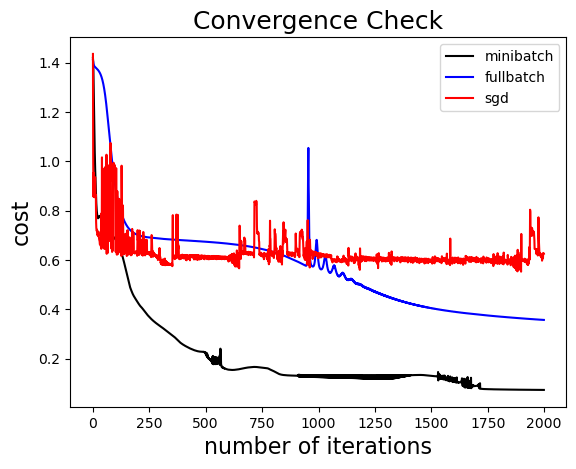

In [25]:
# minibatch   
model_m = MLP(layers = (100,50,5), weight_init_int=(-.7, .7), method='minibatch',
            max_iter=2000, learning_rate=0.3, dlr=0.1, alpha=0.000001, epsilon=0.000001,
            minimethod='CG', batchsize=5)
model_m.fit(dev_train_X,dev_train_y)
print('     the f1-score of the train set is {:.3f}. f1-score of the test set is {:.3f}'.format(model_m.score(dev_train_X,dev_train_y),model_m.score(dev_test_X,dev_test_y)))

# fullbatch
model_f = MLP(layers = (100,50,5), weight_init_int=(-.7, .7), method='fullbatch',
            max_iter=2000, learning_rate=0.3, dlr=0.1, alpha=0.000001, epsilon=0.000001,
            minimethod='CG', batchsize=5)
model_f.fit(dev_train_X,dev_train_y)
print('     the f1-score of the train set is {:.3f}. f1-score of the test set is {:.3f}'.format(model_f.score(dev_train_X,dev_train_y),model_f.score(dev_test_X,dev_test_y)))

# sgd
model_s = MLP(layers = (100,50,5), weight_init_int=(-.7, .7), method='sgd',
            max_iter=2000, learning_rate=0.3, dlr=0.1, alpha=0.000001, epsilon=0.000001,
            minimethod='CG', batchsize=5)
model_s.fit(dev_train_X,dev_train_y)
print('     f1-score of the train set is {:.3f}. f1-score of the test set is {:.3f}'.format(model_s.score(dev_train_X,dev_train_y),model_s.score(dev_test_X,dev_test_y)))

model_m.check_convergence('minibatch','black')
model_f.check_convergence('fullbatch','blue')
model_s.check_convergence('sgd','red')

- In the above methods test, all three methods sgd, minibatch and fullbatch have same f1-score on test set, minibatch has higher f1 score on train set, which could also be observed in the plot (lower cost), sgd has the lowest f1-score on train set. 
- The cost line plot of fullbatch and minibatch are less noisy than sgd.
- More explainations are in the 'YOUR ANSWER HERE' cell.

- I will use minibatch method for the following regularization parameter tuning. 


- 2. compare different alpha values and plot decision boundaris

MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=0, learning_rate=0.3, dlr=0.1)
     f1-score of the train set is 0.962. f1-score of the test set is 0.792
MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-06, learning_rate=0.3, dlr=0.1)
     f1-score of the train set is 0.962. f1-score of the test set is 0.792
MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
     f1-score of the train set is 0.962. f1-score of the test set is 0.900
MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.0001, learning_rate=0.3, dlr=0.1)
     f1-score of the train set is 0.987. f1-score of the test set is 0.850
MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.001, learning_rate=0.3, dlr=0.1)
     f1-score of the train set is 0.849. f1-score of the test set is 0.850
MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alp

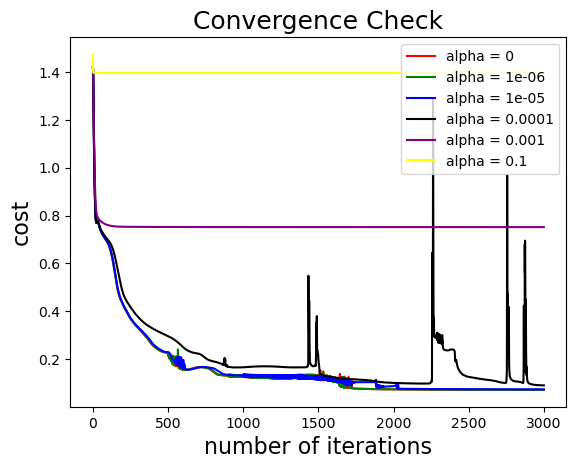

In [26]:
alpha_lst = [0,1e-06,1e-05,1e-04,0.001,0.1]
color_lst = ['red','green','blue','black','purple','yellow','cyan','orange','lime']
for i in range(len(alpha_lst)):
    model = MLP(layers = (100,50,5), weight_init_int=(-.7, .7), method='minibatch',
            max_iter=3000, learning_rate=0.3, dlr=0.1, alpha=alpha_lst[i], epsilon=0.000001,
            minimethod='CG', batchsize=5)
    res = model.fit(dev_train_X,dev_train_y)
    print('     f1-score of the train set is {:.3f}. f1-score of the test set is {:.3f}'.format(model.score(dev_train_X,dev_train_y),model.score(dev_test_X,dev_test_y)))
    model.check_convergence('alpha = {}'.format(alpha_lst[i]),color_lst[i])

- with alpha = 1e-05, the model has the highest f1-score in test set, the corresponding gradient descent converge after 2100 iterations.
- More explainations are in 'YOUR ANSWER HERE' cell.

#### visualize decision boundary

MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=0, learning_rate=0.3, dlr=0.1)
f1-score of the train set is 0.962. f1-score of the test set is 0.792


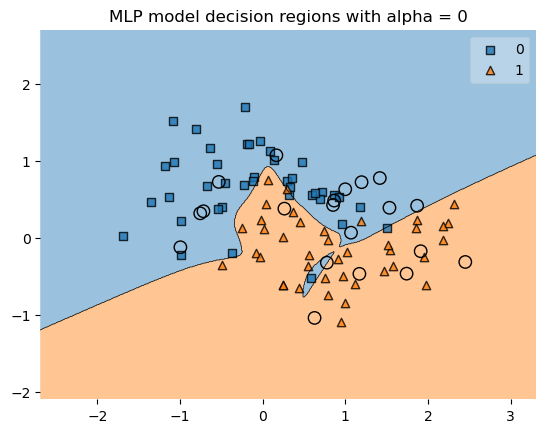

MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-06, learning_rate=0.3, dlr=0.1)
f1-score of the train set is 0.962. f1-score of the test set is 0.792


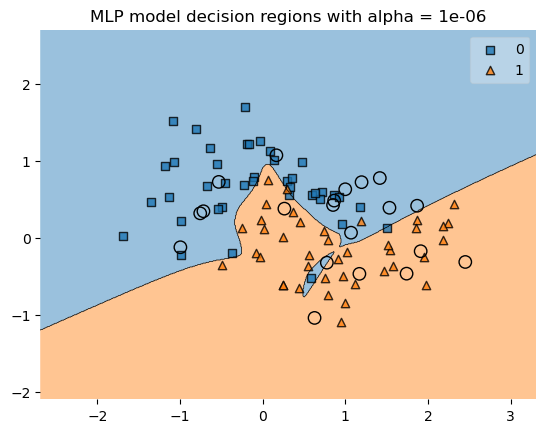

MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of the train set is 0.962. f1-score of the test set is 0.900


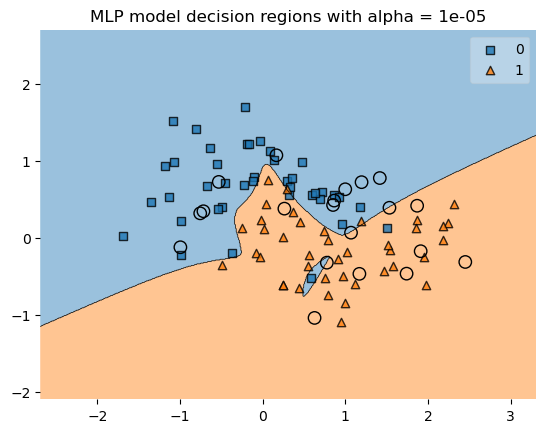

MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.0001, learning_rate=0.3, dlr=0.1)
f1-score of the train set is 0.987. f1-score of the test set is 0.850


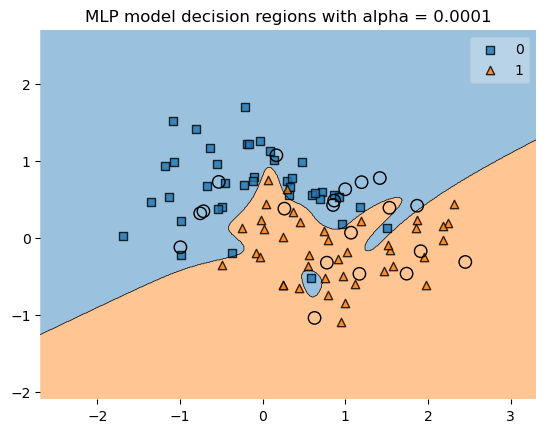

MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.001, learning_rate=0.3, dlr=0.1)
f1-score of the train set is 0.849. f1-score of the test set is 0.850


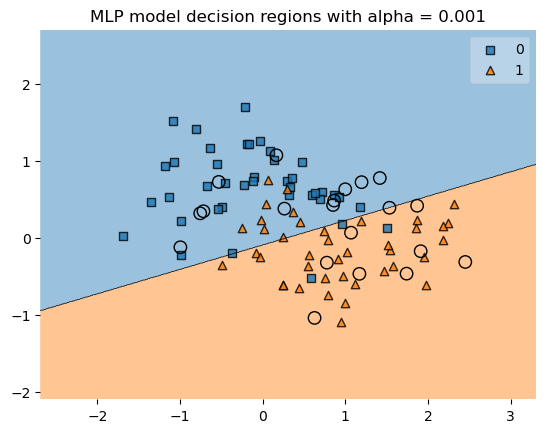

MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.1, learning_rate=0.3, dlr=0.1)
f1-score of the train set is 0.333. f1-score of the test set is 0.333


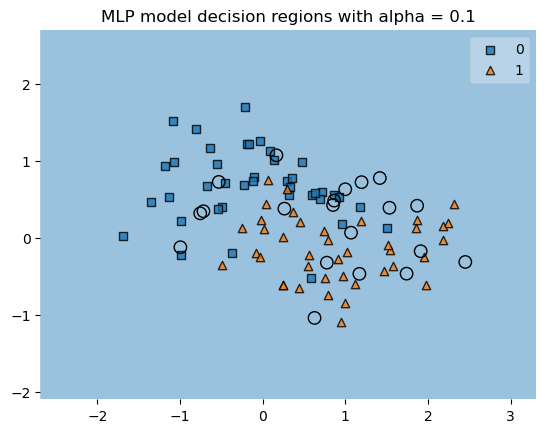

In [27]:
for i in range(len(alpha_lst)):
    model = MLP(layers = (100,50,5), weight_init_int=(-.7, .7), method='minibatch',
            max_iter=3000, learning_rate=0.3, dlr=0.1, alpha=alpha_lst[i], epsilon=0.000001,
            minimethod='CG', batchsize=5)
    res = model.fit(dev_train_X,dev_train_y)
    print('f1-score of the train set is {:.3f}. f1-score of the test set is {:.3f}'.format(model.score(dev_train_X,dev_train_y),model.score(dev_test_X,dev_test_y)))   
    model.decision_regions(model,dev_train_X,dev_train_y,dev_test_X,alpha=alpha_lst[i])

#### check convergence of the optimal model with largest f1-score 

The cost curve is flat when iterations > 2100, this proves that the convergence is reached.

MLP(layers=(100, 50, 5), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of the train set is 0.962. f1-score of the test set is 0.900


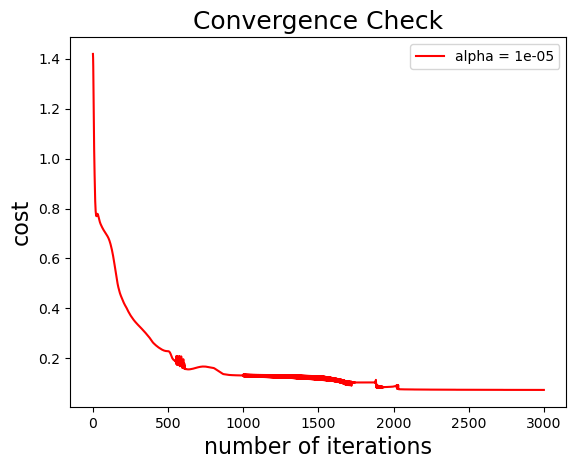

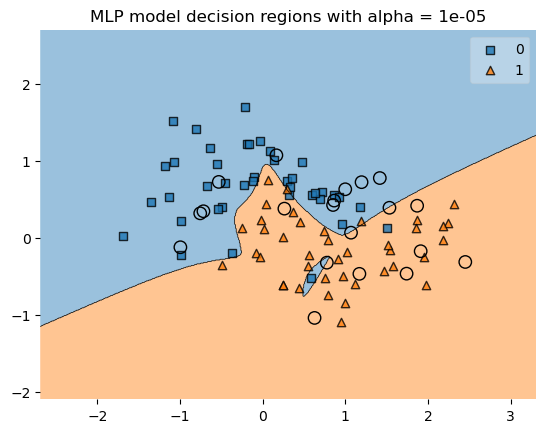

In [28]:
model = MLP(layers = (100,50,5), weight_init_int=(-.7, .7), method='minibatch',
            max_iter=3000, learning_rate=0.3, dlr=0.1, alpha=1e-05, epsilon=0.000001,
            minimethod='CG', batchsize=5)
res = model.fit(dev_train_X,dev_train_y)
print('f1-score of the train set is {:.3f}. f1-score of the test set is {:.3f}'.format(model.score(dev_train_X,dev_train_y),model.score(dev_test_X,dev_test_y)))   
model.check_convergence('alpha = 1e-05',color_lst[0])
plt.show()
model.decision_regions(model,dev_train_X,dev_train_y,dev_test_X,alpha=1e-05)

YOUR ANSWER HERE

1. grad_check function: 

    - The function uses another method to calculate gradient, then compare the normalized gradient and mine to check if they are equal.Using normalized gradient is because gradient is a vector field, it represents the direction not quantity length.
        - The method works like this:  
            - In the coordinate where x axis is theta, y axis is cost, find two points near a theta point, one is theta+epsilon, another is theta-epsilon at x-axis.
            - calculate the cost of the two points base on the cost function formula. 
            - Connect the two points using a straight line, calculate the slope of the line: (y2−y1)/(x2−x1) = Δy/Δx --> (cost of (theta + epsilon) - cost of (theta - epsilon))/(2*epsilon). 
                When the epsilon is close to 0, the slope of the two points is close to the tangent slope of the point theta (gradient of the cost function at the theta point).
    - If the normalized gradients  by two methods are not equal with the decimal, the function will return error. 
    - My result shows no errors, this means my gradient function works correctly.
    

2. check different methods: 'minibatch','fullbatch','sgd'
    - f1 score: all three methods have same f1 score on test set. F1-score on train set minibatch > fullbatch > sgd.
    - Plot: The plot displays the cost values by iteration number. We could see that the fullbatch and minibatch both have smooth decrease line, the sgd has a very noisy line. The minibatch reached the convergence after 1800 iterations. The fullbatch is still decreasing at 2000 iterations, which means fullbatch needs more iterations to find the minimum cost. The sgd is noisy, it is hard to say if it already reached convergence.
        - basics about three methods: gradient descent aims to minimise the given (cost) function of mlp. It will calculate the slope of the current point(thetas), move one step to the slope steepest decrease direction. Calculte the slope of the second point, move one step to the steepest direction of the seconde point,.... until the cost function reaches almost the minimum, where the gradient is almost flat (almost equal to 0). 
        
            - fullbatch: fullbatch will calculate the gradients of all training data, then update thetas by moving one step to the average gradient decrease direction (steepest decrease direction). At the new point (updated thetas) calculate again the average gradients of all training data, update thetas by moving one step to the steepest decrease direction (decrease direction of the average gradient). This means all training data are taken into consideration to take a single step. In each epoch, it takes only one step of gradient descent. The line plot of cost is smooth and keeps on decreasing over epochs. The drawback is the decreasion is very slow, especially when the dataset is very large, to take one step model will have to calculate the gradients of all dataset.
            
            - sgd method: sgd method will take only one train data into consideration to take a single step. In each epoch, it will calculate the gradient of one data point, update thetas by moving one step to the decrease direction of this data point's gradient. At the new point (updated thetas), calculate the gradient of the next train data, move one step to the decrease direction of this data point's gradient (update thetas again). Until through the whole train dataset, it will start the next epoch, and repeat. With this method, the cost may even increase sometimes over the train data. But in long run, it will decrease the cost function with flucatuation. So it will keep dancing around the minima but never reach it. SGD can converge large datasets very fast as it updates parameters more frequently. 
             
            - minibatch: it combines the advantages of sgd and fullbatch. It uses the mean gradient of a fixed number of training data. For example, if I set up 5 as the minibatch size. In each epoch, it will calculate the average gradient of 5 train data, update thetas by moving one step to the decrease direction of the average gradient. At the new point (updated thetas), calculate the average gradient of the next 5 train data, update thetas again based on the new average gradient,... repeat until through all train data, then it will start the next epoch. Minibatch updates parameter more frequently than fullbatch, so it will converge faster. Depends on the dataset and batch size, the cost line may still flucatuate a bit, but much smoother than sgd. 
    
            - In my test, I prefer the minibatch for the modeling. 
                - Because its f1-score on test set is not worse than the other two. 
                - cost line is smoother than sgd, decrease steady from beginning, and reaches the minima earlier than fullbatch.
                - it has one more possible parameter to tune, which is the 'batchsize', it becomes fullbatch when set the batchsize to maximum (dataset size), it becomes sgd when set the batchsize to minimal (1), and it could choose any other values in between. 
            
3. check regularization parameter alpha and the corresponding decision boundaries
    - alpha helps the model to avoid overfitting by penalizing weights with large magnitudes. When alpha=0, there is no regularization on model
    - increasing alpha may cause high variance, low generalization, lead to overfitting and result a more complicated decision boundary. 
    - but when alpha is very large, then it will add too much weight, lead to underfitting and result a simplier decision boundary.
    
    - In my results:
        - when increase alpha from 1e-06, the model f1-score on train set increased, and reached the maximum with alpha = 1e-04. But the f1-score on test set reached the maximum with alpha = 1e-05. Check the decision boundary, we could see that, the decision boundary at alpha = 1e-04 is the most complex, which indicated this model may be overfitting.
        - When further increase alpha, the f1-score on train set began to decrease. Test set f1-scores are also decreasing. Because it added too much weight, lead to model underfitting. The decision boundaries are also simplier. With alpha= 0.001, decision boundary is a straight line. With alpha=0.1, there is no decision boundary while the whole region belongs to one class. 
        
        - When alpha = 0, there is no regularization, the model has the same scores as alpha = 1e-06: 0.962 on train set, 0.792 on test set. Both models are likely overfitting, because the f1 difference between train and test set is large.
                
        - In all the tests, the model with alpha = 1e-05 gets the best f1 score on test set, which is 0.900 (0.962 on train set). The decision boundary is okay, but not so simple. Especially the boundary formed a ring in the middle because there is one data point with label '0' surrounded by many '1' label data points. Since this is a very small dataset with only two features. The model still performs good on test set. It is better to apply cross validation, or simply re-run the whole process a few times. Then the result may be more reliable. 
        
4. Select the optimal model: with alpha = 1e-05, method = 'minibatch' with batchsize = 5, three layers with nodes of (100,50,5)
    - After 2100 iterations, the cost value does not change anymore. This indicates the gradient descent converges.
    

### Aufgabe 5 - MLP Anwendung (5 Punkte)

Verwende deine Implementierung des Multi-Layer Perceptrons, um unseren Datensatz zu klassifizieren.  
(Falls deine Implementierung nicht funktionieren sollte, kannst du scikit-learn verwenden. Damit kannst du noch 3 Punkte erreichen.)

Finde ein möglichst gutes Modell im Sinne der Zielmetrik.  

Evaluiere und diskutiere die Resultate, zeichne dabei auch die Confusion Matrix auf dem Testset.  

In [24]:
### YOUR CODE HERE
# Use the scaled input data: X_mototrain_sc, X_mototest_sc
y_mototrain_np = y_mototrain.to_numpy().reshape(-1,1)# convert dataframe to numpy
y_mototest_np = y_mototest.to_numpy().reshape(-1,1)# convert dataframe to numpy
color_lst = ['black','red','blue','green','orange','magenta','cyan']

- try different methods
- To save time I set max_iter = 200 for all the parameter tuning. It helps to select the optimal parameters though more iterations are needed for gradient descent to converge.

MLP(layers=(50, 50), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.916, f1-score of test dataset is: 0.604
MLP(layers=(50, 50), weight_init=(-0.7, 0.7), method="fullbatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.360, f1-score of test dataset is: 0.349
MLP(layers=(50, 50), weight_init=(-0.7, 0.7), method="sgd", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.663, f1-score of test dataset is: 0.530


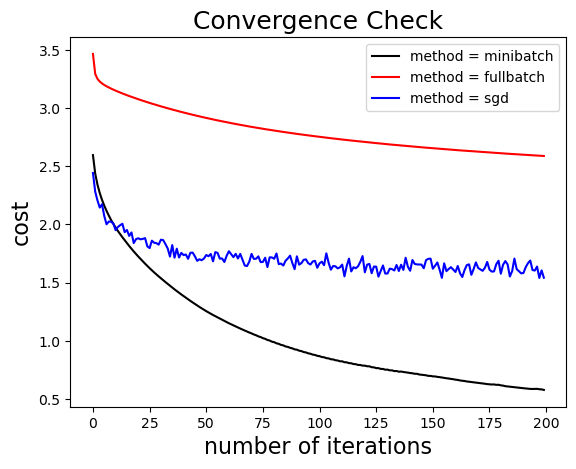

In [30]:
methods_lst = ['minibatch','fullbatch','sgd']
for i in range(len(methods_lst)):
    model = MLP(layers = (50,50), weight_init_int=(-.7, .7), method=methods_lst[i],
                max_iter=200, learning_rate= .3, dlr=0.1, alpha=1e-05, epsilon=0.000001,
                minimethod='CG', batchsize=20)
    mlp = model.fit(X_mototrain_sc,y_mototrain_np)
    print('f1-score of training dataset is: {:.3f}, f1-score of test dataset is: {:.3f}'.format(model.score(X_mototrain_sc,y_mototrain_np),model.score(X_mototest_sc,y_mototest_np)))
    model.check_convergence('method = {}'.format(methods_lst[i]),color_lst[i])

- For the dataset moto, quick test (only with 200 iterations) which method works better. Though more iterations are needed to reach gradient descent convergence, it is already obvious that the model using minibatch got better score than fullbatch and sgd with 200 iterations.
- Select minibatch method for further hyperparameter tuning.

### hyperparameter tuning
    - 1. test two hidden layers with different number of nodes

MLP(layers=(20, 20), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.702, f1-score of test dataset is: 0.559
MLP(layers=(50, 50), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.916, f1-score of test dataset is: 0.604
MLP(layers=(80, 80), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.958, f1-score of test dataset is: 0.616
MLP(layers=(100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.970, f1-score of test dataset is: 0.625
MLP(layers=(120, 120), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.981, f1-score of test dataset is: 0.618


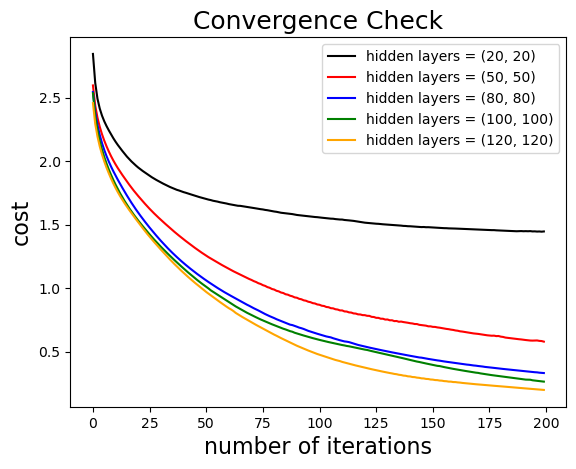

In [31]:
layers_lst = [(20,20),(50,50),(80,80),(100,100),(120,120)]
for i in range(len(layers_lst)):
    model = MLP(layers = layers_lst[i], weight_init_int=(-.7, .7), method='minibatch',
                max_iter=200, learning_rate= .3, dlr=0.1, alpha=1e-05, epsilon=0.000001,
                minimethod='CG', batchsize=20)
    mlp = model.fit(X_mototrain_sc,y_mototrain_np)
    print('f1-score of training dataset is: {:.3f}, f1-score of test dataset is: {:.3f}'.format(model.score(X_mototrain_sc,y_mototrain_np),model.score(X_mototest_sc,y_mototest_np)))
    model.check_convergence('hidden layers = {}'.format(layers_lst[i]),color_lst[i])

- the f1 score of test set is largely increased when the nodes per layer increasing from 30 to 100. When further increase nodes to 120, the train set f1-score increased, but the test set decreased, this means too many nodes may lead model overfitting. 
    2. test different number of hidden layers with 100 nodes per hidden layer. 

MLP(layers=(100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.970, f1-score of test dataset is: 0.625
MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.974, f1-score of test dataset is: 0.628
MLP(layers=(100, 100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.975, f1-score of test dataset is: 0.629


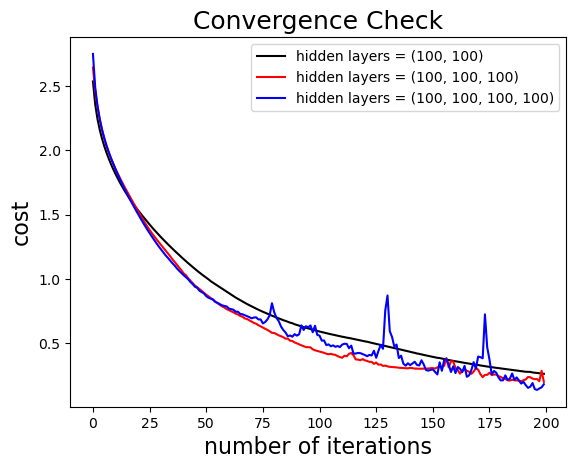

In [35]:
layers_lst = [(100,100),(100,100,100),(100,100,100,100)]
for i in range(len(layers_lst)):
    model = MLP(layers = layers_lst[i], weight_init_int=(-.7, .7), method='minibatch',
                max_iter=200, learning_rate= .3, dlr=0.1, alpha=1e-05, epsilon=0.000001,
                minimethod='CG', batchsize=20)
    mlp = model.fit(X_mototrain_sc,y_mototrain_np)
    print('f1-score of training dataset is: {:.3f}, f1-score of test dataset is: {:.3f}'.format(model.score(X_mototrain_sc,y_mototrain_np),model.score(X_mototest_sc,y_mototest_np)))

    model.check_convergence('hidden layers = {}'.format(layers_lst[i]),color_lst[i])

- model with three hidden layers (100,100,100) and (100,100,100,100) have very similiar f1-score. The improvement with four layers is very small than with three layers. And the cost line with (100,100,100,100) is more noisy. So I will use (100,100,100) hidden layer setting in the model.
    3. test values of regularization parameter alpha.

MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-07, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.986, f1-score of test dataset is: 0.625
MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.974, f1-score of test dataset is: 0.628
MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.001, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.447, f1-score of test dataset is: 0.435
MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.01, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.059, f1-score of test dataset is: 0.066
MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.1, learning_rate=0.3, dlr=0.1)
f1-score of training dataset is: 0.059, f1-score of test dataset is: 0.066


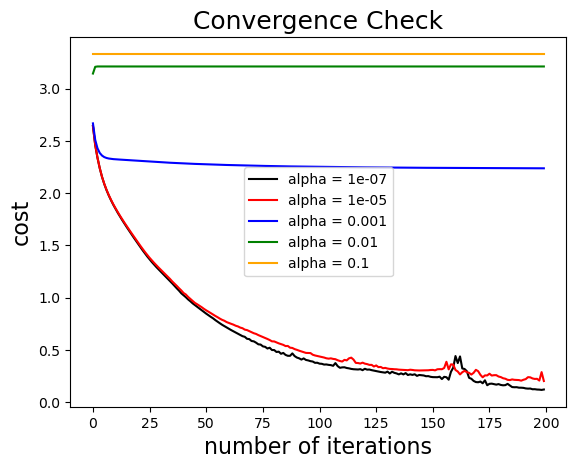

In [36]:
alpha_lst = [1e-07,1e-05,1e-03,1e-02,1e-01]
for i in range(len(alpha_lst)):
    model = MLP(layers = (100,100,100), weight_init_int=(-.7, .7), method='minibatch',
                max_iter=200, learning_rate= .3, dlr=0.1, alpha=alpha_lst[i], epsilon=0.000001,
                minimethod='CG', batchsize=20)
    mlp = model.fit(X_mototrain_sc,y_mototrain_np)
    print('f1-score of training dataset is: {:.3f}, f1-score of test dataset is: {:.3f}'.format(model.score(X_mototrain_sc,y_mototrain_np),model.score(X_mototest_sc,y_mototest_np)))
    model.check_convergence('alpha = {}'.format(alpha_lst[i]),color_lst[i])

- model with alpha = 1e-05 has the highest f1-score. 
    4. test different batch sizes.

MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
batchsize 10, f1-score of training dataset is: 0.981, f1-score of test dataset is: 0.634
MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
batchsize 20, f1-score of training dataset is: 0.992, f1-score of test dataset is: 0.634
MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
batchsize 40, f1-score of training dataset is: 0.987, f1-score of test dataset is: 0.644
MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)
batchsize 80, f1-score of training dataset is: 0.989, f1-score of test dataset is: 0.637


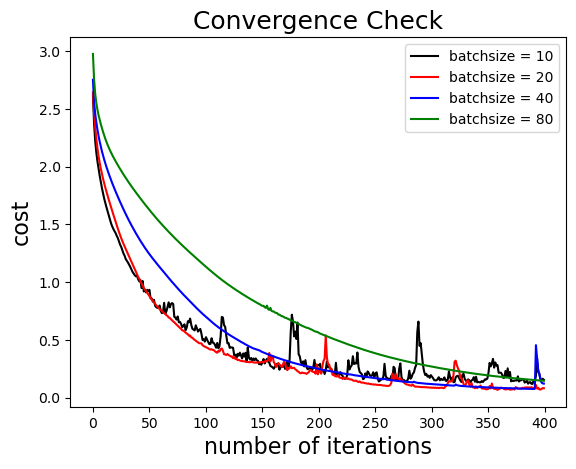

In [37]:
batch_lst = [10,20,40,80]
for i in range(len(batch_lst)):
    model = MLP(layers = (100,100,100), weight_init_int=(-.7, .7), method='minibatch',
                max_iter=400, learning_rate= .3, dlr=0.1, alpha=1e-05, epsilon=0.000001,
                minimethod='CG', batchsize=batch_lst[i])
    mlp = model.fit(X_mototrain_sc,y_mototrain_np)
    print('batchsize {}, f1-score of training dataset is: {:.3f}, f1-score of test dataset is: {:.3f}'.format(batch_lst[i],model.score(X_mototrain_sc,y_mototrain_np),model.score(X_mototest_sc,y_mototest_np)))
    model.check_convergence('batchsize = {}'.format(batch_lst[i]),color_lst[i])

- Model with batchsize of 40 has the largest f1-score.
### Optimal model
- check gradient descent convergence with the above selected parameter settings.

In [25]:
model = MLP(layers = (100,100,100), weight_init_int=(-.7, .7), method='minibatch',
                max_iter=800, learning_rate= .3, dlr=0.1, alpha=1e-05, epsilon=0.000001,
                minimethod='CG', batchsize=40)
mlp = model.fit(X_mototrain_sc,y_mototrain_np)

MLP(layers=(100, 100, 100), weight_init=(-0.7, 0.7), method="minibatch", alpha=1e-05, learning_rate=0.3, dlr=0.1)


f1-score of training dataset is: 0.998, f1-score of test dataset is: 0.634


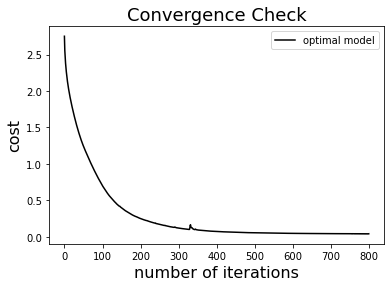

In [28]:
print('f1-score of training dataset is: {:.3f}, f1-score of test dataset is: {:.3f}'.format(model.score(X_mototrain_sc,y_mototrain_np),model.score(X_mototest_sc,y_mototest_np)))
model.check_convergence('optimal model',color_lst[0])

###  - confusion matrix of the optimal model with the possibly largest f1-score.

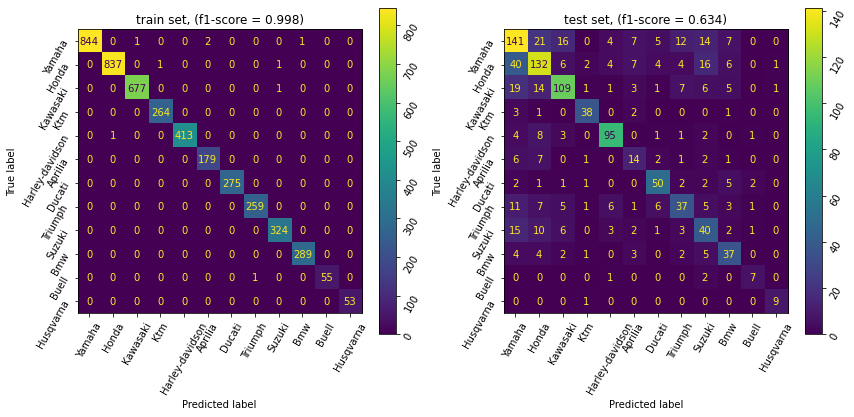

In [36]:
# display confusion matrix
fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=(14,6))
label_lst = moto_train['brand'].unique() 
# train set
cfmx_train = confusion_matrix(y_mototrain_np, model.predict(X_mototrain_sc), labels=label_lst) 
ConfusionMatrixDisplay(confusion_matrix=cfmx_train,display_labels=label_lst).plot(ax=axes[0])    
axes[0].set_title("train set, (f1-score = {:.3f})".format(model.score(X_mototrain_sc,y_mototrain_np)))
# test set
cfmx_test = confusion_matrix(y_mototest_np, model.predict(X_mototest_sc), labels=label_lst) 
ConfusionMatrixDisplay(confusion_matrix=cfmx_test,display_labels=label_lst).plot(ax=axes[1])  
axes[1].set_title("test set, (f1-score = {:.3f})".format(model.score(X_mototest_sc,y_mototest_np))) 
for ax in fig.axes:  # rotate ticks
    ax.tick_params(labelrotation=60)  

YOUR ANSWER HERE

1. parameter tuning: in each step tune only one parameter, to find out the setting results the optimal f1-score.

    - scan different number of nodes per hidden layer -> select 100 nodes per layer 
    - test different number of hidden layers -> select 3 hidden layers 
    - test values of regularization parameter alpha -> select alpha = 1e-05
    - batchsize of minibatch method -> select 40 data points per minibatch
    
2. with the above settings, 
    - the model has the f1-score 0.998 on train set, 0.634 on test set
    - confusion matrix: model predict train set almost perfect. In the test set, the features Yamaha and Honda have large false negative and false positive, indicating low precision and recall.
    - the cost value is not anymore changing after 700 iterations, this means the gradient descent convergence is reached.

3. The f1-score and confusion matrix differences between train and test are large. Could be that the model is overfitting.
    - could consider reducing number of features. for instance, step-wise feature selection, dimension reduction methods PCA, NMF,...
    - use balanced target labels, e.g. undersamping or oversampling 
      

### Aufgabe 6 - Decision Tree - Theorie (6 Punkte)

Erkläre wie ein Decision Tree erstellt wird.  

Welche Rolle spielen dabei Metriken wie die Entropie oder Gini-Index?  

Was sind die Eigenschaften der Decision Boundary bei Decision Trees?  

Wodurch kann bei Decision Trees Overfitting entstehen? Diskutiere welche Ansätze möglich sind, um Overfitting zu vermeiden.

YOUR ANSWER HERE

- wie ein Decision Tree erstellt wird?

    Decision tree is a non-parametric supervised learning method. It uses tree-like model for classification and regression. 

    1. To build a decision tree, we start with the top node/root which represents the whole dataset.
    2. We search over all possible split attributes to find the one that is most informative or in another word, the one generate new nodes with the highest purity. 
    3. split node by this feature.This will generate multiple new nodes.
    4. For each new node, we repeat step 2 and 3. Until it reaches the maximal depth that we defined or the node purity reaches the stop criteria.
    5. class prediction of a node is dependent on the label which has the most number in the node.All observations in this node will have this label as their prediction result.
    

- Welche Rolle spielen dabei Metriken wie die Entropie oder Gini-Index?
    - Both Entropy and Gini-index are metrices to assess the sample purity. A node is pure if it includes only one class/label, the node is impure if it includes multiple classes.
    - Entropy: entropy measures the impurity or uncertainty of the oberservations in a group. A low entropy indicates a high purity group. When exactly 50% of the data belongs to each of the labels, the entropy is the highest.
      For decision tree model we could calculate the information gain to decide if the split is good or not. Information gain = entropy of parent node - sum of weighted entropies of child nodes. A large information gain means the purity is increased by this split. So we should choose the feature which split data with the largest information gain. But information gain has a drawback, it favours the features which have many possible values.To address this bias, people introduced a normalizing term to information gain, the new criteria is called information gain ratio. Gain ratio = Information gain /  Intrinsic Information. We should use the attribute which have the largest gain ratio to split the node.
    - Gini-index: First, let's understand what is gini value. When we randomly choose two samples from a group, Gini value indicates the probability that the two labels are different.Gini value is between 0 and 1. A small Gini value indicates high purity of the group. In decision tree model, a feature will usually split a parent node into a few child nodes. To calculate and compare the child nodes purity by different attributes, we need to use gini index, which is like a weighted mean of all the child nodes' gini values. From all the attribute condidates, we should choose the one which has the smallest gini index. 
    


- Was sind die Eigenschaften der Decision Boundary bei Decision Trees?
    - decision boundary in decision tree is the overlapping of straight lines(representing the result of each subsequent decision). 
    - It will never become a smooth curvline through improving model performance or any other parameter changes.
    

- Wodurch kann bei Decision Trees Overfitting entstehen? Diskutiere welche Ansätze möglich sind, um Overfitting zu vermeiden.
    
    - Decision tree is very sensitive to data. For instance, when we change the value of one sample which is exactly at the splitting criterial.The tree may already split quite differently. Given the architecture of decision tree model, when the tree grows very deep, it tends to overfit training data.
    - There are three strategies to help avoiding overfitting:
        1. pre-pruning: It will evaluate the purity of the parent node and the child nodes before it starts to split. This means in the step 2 of the first question (how to generate decision tree), after selecting the best attribute, we also need to check if the gini index before splitting is larger than after. If the gini-index is larger, then we should not further split this tree, but set it as end node. However pre_pruning has its drawback, that decision tree will have too little branches, all the data stay around root. Though the trimmed branches cant improve the purity, the splits which come later based on this trimmed branch, may largely improve the purity. So we should be careful with pre-pruning, it may lead decision tree model underfitting.
        2. post-pruning: It allows the decision tree grows to its max depth.Afterwards, it starts to trim some branches to avoid overfitting.   
        3. using random forest: it is an ensemble learning method based on decision tree. Instead of choosing the best split attribute for each node (decision tree), random forest will for each node randomly choose a subset which includes k attributes, select the best one from these k attributes to split. This usually can improve the model generalization.
        4. reduce the data dimension, for instance, by principal components analysis. 


### Aufgabe 7 - Decision Tree - Anwendung I (4 Punkte)

Betrachte nun eine Vorhersage der Variablen `has_mfk`.  
Berechne dazu einen Entscheidungsbaum mit vier Teilräumen 'manuell', das heisst, bloss auf der Basis von Numpy-Funktionalität und unter Verwendung des Gini-Index.  

Visualisiere den resultierenden Baum und diskutiere seine Entstehung.  

Wie gut ist die Vorhersage? 

In [47]:
# YOUR CODE HERE
def gini(x):
    '''
    calculate the gini of a node or group
    x: input data, should be in series form, for this task will be the value in 'has_mfk' column
    
    return
    ------
    gini: gini value of the input series
    '''
    # count each label in this series, and convert to ratio by dividing the total data size
    # calculate gini value = 1 - sum(p^2)  # p of each label
    cnt_0 = len(x[x==0])
    cnt_1 = len(x[x==1])
    gini = 1 - np.sum((cnt_0/len(x))**2 + (cnt_1/len(x))**2)
    return gini
   
def split(df_train,df_test,feature,d_type):
    '''
    split data by one feature and condition(the value a to split data in two parts), get two or more new nodes afterwards
    df_train: train set
    df_test: test set
    feature: the feature will be used to split  
    d_type: data type, 'numeric' or 'categorical'.
    
    return
    ------
    gini_index: the gini index of an attribute/feature (weighted mean gini values of the nodes after split) 
    df_lst: contains all the nodes data from train set (after split) in one list
    df_test_lst: contains all the nodes data from test set (after split) in one list
    '''
    gini_index = 0
    df_lst = []
    df_test_lst = []
    if d_type == 'numeric':
        a = np.median(df_train[feature])  # if data is numerica data, then split by value a, one part <= a, another part > a 
        df1 = df_train[df_train[feature]<= a]
        df1_test = df_test[df_test[feature]<=a]
        if len(df1)!= 0:
            df_lst.append(df1)
            df_test_lst.append(df1_test)
            gini_1 = len(df1)/len(df_train) * gini(df1['has_mfk']) #weighted 
        else: gini_1 = 0
        df2 = df_train[df_train[feature]> a]
        df2_test = df_test[df_test[feature]>a]
        if len(df2)!=0:
            df_lst.append(df2)
            df_test_lst.append(df2_test)
            gini_2 = len(df2)/len(df_train)* gini(df2['has_mfk']) #weighted
        else: gini_2 = 0
        gini_index = gini_1 + gini_2 # gini_index (weighted gini)
        
    elif d_type == 'categorical':
        label_lst = df_train[feature].unique()   # extract labels of this categorical feature
        for i in range(len(label_lst)):  
            df_new = df_train[df_train[feature]==label_lst[i]]   # new node groupby the feature = label[i]
            df_test_new = df_test[df_test[feature]==label_lst[i]]  # split test set by the same setting
            if len(df_new) !=0:
                gini_new = len(df_new)/len(df_train)* gini(df_new['has_mfk'])  # weighted gini value
            else: gini_new = 0
            df_lst.append(df_new)
            df_test_lst.append(df_test_new)
            gini_index += gini_new
    
    return gini_index, df_lst, df_test_lst   # gini-index of the feature, a list include all the nodes(after split) of train set, nodes list of test set

def best_split(df,df_test):
    '''
    Use train set to find out the best split through all possible features. 
    For the numeric features, split from the median value to two nodes (value <= median and value > median).
    df: the input data of the train set, or say the node before split   
    
    return
    ------
    min_gini: the smallest gini index 
    best_feature: the split feature which has the smallest gini index 
    labels: string with the split information, will be used for printing the decision tree. e.g. brand = Bmw; registration_age <= 62.0 
    d_type: the datatype of the best feature, 'numeric' or 'categorical'
    '''
    num_fea_lst = df._get_numeric_data().drop(['has_mfk'],axis=1).columns   #the numeric feature (for splitting) names in a list.
    cat_fea_lst = df.select_dtypes(include=['object']).columns   #categorical feature(used for splitting) names in a list.
    feature_lst = num_fea_lst.append(cat_fea_lst) # merged feature list: first numeric features, then categorical features.
    min_gini = 1  # set initially the smallest gini index as 1.

    for i in range(len(num_fea_lst)):
        after_gini = split(df,df_test,num_fea_lst[i], 'numeric')[0] # the gini index of the split feature
        if after_gini < min_gini:  # if this feature gini-index smaller, it means purity is improved by this feature
            min_gini = after_gini
            min_index = i
            d_type = 'numeric'
        
    for j in range(len(cat_fea_lst)):  
        after_gini = split(df,df_test,cat_fea_lst[j],'categorical')[0]
        if after_gini < min_gini: 
            min_gini = after_gini
            min_index = j + len(num_fea_lst) + 1
            d_type = 'categorical'
            
    best_feature = feature_lst[min_index]  # find out the best feature with smallest gini index    
    if d_type == 'categorical':
        labels = '{} = '.format(best_feature) + df[best_feature].unique() # labels: for printing split information,e.g. brand = Bmw
    elif d_type == 'numeric':
        labels = ['{} <= {}'.format(best_feature, df[best_feature].median()), '{} > {}'.format(best_feature, df[best_feature].median())]
    return  min_gini,best_feature,labels,d_type  # the smallest gini index, the feature with smallest gini, labels with split info, data type of the best feature 

def tree_info(df_train,depth):
    '''
    print information of split rule, gini value of each node, label distribution in each node, prediction of each node
    '''
    space = '    '*(depth+1) + '|'
    print('{} Gini of the node: {:.3f}'.format(space, gini(df_train['has_mfk'])))
    print('{} label distribution in the node: class 0: {}; class 1: {}'.format(space,df_train['has_mfk'].value_counts()[0],df_train['has_mfk'].value_counts()[1]))
    if len(df_train[df_train['has_mfk']==0])> len(df_train[df_train['has_mfk']==1]):
        print('{} predicted class: 0'.format(space))
    else:
        print('{} predicted class: 1'.format(space))

def tree_growing(df_train,df_test,depth,max_dep):
    '''
    grow the tree by splitting each node by its best feature, get new child nodes, split each child node,...,
    When it reaches the maximum depth, store the end node data.
    Use train set to find out the best split for each node. Test set will use the same split rule as train set.
    
    df_train: train set 
    df_test: test_set
    depth: current depth
    max_dep: maximum depth   
    
    return
    ------
    ytrue_lst: true output value list from all end nodes of train set 
    ypred_lst: predicted output value list from all end nodes of train set
    ytrue_test_lst: true output value list from all end nodes of test set  
    ypred_test_lst: predicted output value list from all end nodes of test set
    '''
    tree_info(df_train,depth)
    node_tobe_sp = df_train     # node to be splitted (in train set)
    node_tobe_sp_test = df_test # node to be splitted (in test set)
    if depth < max_dep:
        d_type = best_split(node_tobe_sp,df_test)[3]  # find out the best split feature for the node
        feature = best_split(node_tobe_sp,df_test)[1]
        split_labels = best_split(node_tobe_sp,df_test)[2]
        depth += 1
        df_lst = split(df_train,df_test,feature,d_type)[1]      # new generated child nodes of train set 
        df_test_lst = split(df_train,df_test,feature,d_type)[2]  # new generated child nodes of test set using the same split rule as train set
        for i in range(len(df_lst)):
            node_tobe_sp = df_lst[i]  # the new generated child nodes will be splitted (train set) 
            node_tobe_sp_test = df_test_lst[i]  # the new generated child nodes will be splitted (test set) 
            if gini(node_tobe_sp['has_mfk']) != 0:   # when the gini is not 0, or say when the node is not pure, split it.            
                space = '----'*(depth+1)
                print('{} split by {}'.format(space,split_labels[i]))       # print split rule          
                tree_growing(node_tobe_sp,node_tobe_sp_test,depth,max_dep)   # iterate
            else: continue   # when gini = 0, or say the node is pure, jump to the next node in list
    else:    # when iteration stops, the nodes won't be anymore splitted, they are the end nodes. Here should collect all their data for evaluation. 
        ytrue = node_tobe_sp['has_mfk']*1  # true output value in one node of train set
        ytrue_test = node_tobe_sp_test['has_mfk']*1   # true output value in one node of test set
        if len(ytrue[ytrue==0]) > len(ytrue[ytrue==1]):  # if the nodes has more value 0 than value 1
            ypred = [0]*len(ytrue)                       # the node will get the prediction label of 0  
        else: ypred = [1]*len(ytrue)
        if len(ytrue_test[ytrue_test==0]) > len(ytrue_test[ytrue_test==1]):
            ypred_test = [0]*len(ytrue_test)
        else: ypred_test = [1]*len(ytrue_test)
        ytrue_lst.append(ytrue)
        ypred_lst.append(ypred)
        ytrue_test_lst.append(ytrue_test)
        ypred_test_lst.append(ypred_test)
    return ytrue_lst,ypred_lst,ytrue_test_lst,ypred_test_lst

def fit(df_train,df_test,depth,max_dep):
    '''
    make a decision tree based on the train set, and apply the model on test set.
    df_train: train set 
    df_test: test_set
    depth: current depth
    max_dep: maximum depth
    
    return
    ------
    f1-score of train set
    f1-score of test set
    
    '''
    print('Root')
    result = tree_growing(df_train,df_test,depth ,max_dep)
    ytrue = np.array(np.concatenate(result[0]).flat)
    ypred = np.array(np.concatenate(result[1]).flat)
    ytrue_test = np.array(np.concatenate(result[2]).flat)
    ypred_test = np.array(np.concatenate(result[3]).flat)
    return f1score(ytrue,ypred),f1score(ytrue_test,ypred_test)
 
def f1score(ytrue,ypred):
    ''' 
    calculate f1-score
    ytrue: true output value
    ypred: predicted output value
    
    return
    ------
    f1-score
    '''
    TP,TN,FP,FN=0,0,0,0   # true positive, true negative, false positive, false negative
    for i in range(len(ytrue)):
        if ytrue[i]==1 and ypred[i] ==1:
            TP +=1
        elif ytrue[i]==0 and ypred[i] ==0:
            TN += 1
        elif ytrue[i]==1 and ypred[i] ==0:
            FN += 1
        elif ytrue[i]==0 and ypred[i] ==1:
            FP += 1
    precision = TP/(TP+FP)
    recall = TP/(TP + FN)
    return 2*precision*recall/(precision + recall)   

In [48]:
# This model can take categorical features, so I will use the moto dataset with original features.
train_7 = moto.sample(frac=0.8, random_state=155) # split the moto into training and test data: 80% to 20%
test_7 = moto.drop(train_7.index)
# check train, test data
train_7.shape,test_7.shape

((4478, 12), (1120, 12))

In [49]:
train_7.head(3)

body_shape   colour condition  displacement             fuel  has_mfk  \
2164    Touring  schwarz  Occasion        1833.0  Benzin Bleifrei     True   
4659    Scooter    braun  Occasion         125.0           Benzin    False   
592     Strasse     blau  Occasion         999.0  Benzin Bleifrei     True   

      performance  price  curb_weight  registration_age  mileage   brand  
2164        126.0  29700        460.0                19   2000.0   Honda  
4659         12.0   1871        201.0                50  13680.0   Honda  
592         145.0  12900        329.0                32   1400.0  Suzuki

In [50]:
# decision tree with 4 depth
ytrue_lst,ypred_lst,ytrue_test_lst,ypred_test_lst = [],[],[],[]
tree_res = fit(train_7,test_7,depth=0,max_dep=4)

Root
    | Gini of the node: 0.489
    | label distribution in the node: class 0: 2565; class 1: 1913
    | predicted class: 0
-------- split by registration_age <= 77.0
        | Gini of the node: 0.351
        | label distribution in the node: class 0: 512; class 1: 1742
        | predicted class: 1
------------ split by registration_age <= 21.0
            | Gini of the node: 0.203
            | label distribution in the node: class 0: 130; class 1: 1005
            | predicted class: 1
---------------- split by brand = Honda
                | Gini of the node: 0.173
                | label distribution in the node: class 0: 21; class 1: 198
                | predicted class: 1
-------------------- split by condition = Occasion
                    | Gini of the node: 0.132
                    | label distribution in the node: class 0: 9; class 1: 118
                    | predicted class: 1
-------------------- split by condition = Vorführmodell
                    | Gini of the nod

In [51]:
print('My decision tree model with {} depth has f1-score on train set of: {:.3f}, on test set of: {:.3f}'.format(4, tree_res[0],tree_res[1])) 

My decision tree model with 4 depth has f1-score on train set of: 0.878, on test set of: 0.858


YOUR ANSWER HERE

- My 4-depth decision tree model aims to classify 'has_mfk' attribute. It has good f1-score on both train set 0.878, and test set 0.858, and the f1-score on train set is slightly higher than test set, this indicates my model is likely not overfitting (where f1 on train often much higher than test) or underfitting (where f1 difference on train and test very small, or even higher f1-score on test set)

- split rules: 
    - four attributes registration_age, brand, condition, mileage are used to split features in my 4-depth decision tree. 
    - condition is very often applied as the split feature to the child nodes splitted by brand. This means, within each car brand, car condition and has_mfk are correlated.  


### Aufgabe 8 - Decision Tree - Anwendung II (5 Punkte)

Verwende nun einen Decision Tree von scikit-learn zur Klassifikation von `brand`.

Zeichne den besten resultierenden Baum und erkläre ihn.

Evaluiere und diskutiere die Resultate, zeichne dabei auch die Confusion Matrix auf dem Testset.

In [43]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree


max_f1 = 0
for i in range(1,31):  # test different depth
    dtree = DecisionTreeClassifier(random_state=40,max_depth=i,criterion='gini')  #model
    dtree.fit(X_mototrain,y_mototrain)
    y_mototrain_pred = dtree.predict(X_mototrain)
    y_mototest_pred = dtree.predict(X_mototest)    
    print('  tree-depth: {}. f1-score on training data: {:.3f}. f1-score on test data: {:.3f}'.format(i,f1_score(y_mototrain,y_mototrain_pred,average='weighted'),f1_score(y_mototest,y_mototest_pred,average='weighted')))
    if f1_score(y_mototest,y_mototest_pred,average='weighted') > max_f1:
        max_f1 = f1_score(y_mototest,y_mototest_pred,average='weighted')
        max_i = i 
        f1_train = f1_score(y_mototrain,y_mototrain_pred,average='weighted')

  tree-depth: 1. f1-score on training data: 0.123. f1-score on test data: 0.144
  tree-depth: 2. f1-score on training data: 0.191. f1-score on test data: 0.205
  tree-depth: 3. f1-score on training data: 0.245. f1-score on test data: 0.246
  tree-depth: 4. f1-score on training data: 0.313. f1-score on test data: 0.308
  tree-depth: 5. f1-score on training data: 0.332. f1-score on test data: 0.321
  tree-depth: 6. f1-score on training data: 0.380. f1-score on test data: 0.338
  tree-depth: 7. f1-score on training data: 0.443. f1-score on test data: 0.402
  tree-depth: 8. f1-score on training data: 0.523. f1-score on test data: 0.472
  tree-depth: 9. f1-score on training data: 0.599. f1-score on test data: 0.564
  tree-depth: 10. f1-score on training data: 0.678. f1-score on test data: 0.638
  tree-depth: 11. f1-score on training data: 0.744. f1-score on test data: 0.684
  tree-depth: 12. f1-score on training data: 0.804. f1-score on test data: 0.737
  tree-depth: 13. f1-score on trainin

### optimal decision tree model based on metric f1-score

- the model with the highest f1 score on test set is selected

In [44]:
print('With tree-depth {}, f1-score on train set : {:.3f}, on test set: {:.3f}, '.format(max_i,f1_train,max_f1))

With tree-depth 21, f1-score on train set : 0.996, on test set: 0.898, 


In [45]:
feature_lst = X_mototrain.columns
# the best decision tree model 
dtree = DecisionTreeClassifier(random_state=40,max_depth=max_i,criterion='gini')  #model
dtree.fit(X_mototrain_sc,y_mototrain)
draw_tree = tree.export_text(dtree,feature_names = feature_lst.to_list() )
print(draw_tree)

|--- displacement <= 1.14
|   |--- grün <= 2.03
|   |   |--- orange <= 2.20
|   |   |   |--- displacement <= -0.19
|   |   |   |   |--- displacement <= -0.21
|   |   |   |   |   |--- displacement <= -0.34
|   |   |   |   |   |   |--- displacement <= -0.52
|   |   |   |   |   |   |   |--- displacement <= -1.63
|   |   |   |   |   |   |   |   |--- curb_weight <= -1.18
|   |   |   |   |   |   |   |   |   |--- displacement <= -1.68
|   |   |   |   |   |   |   |   |   |   |--- curb_weight <= -1.69
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- curb_weight >  -1.69
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- displacement >  -1.68
|   |   |   |   |   |   |   |   |   |   |--- displacement <= -1.66
|   |   |   |   |   |   |   |   |   |   |   |--- class: Honda
|   |   |   |   |   |   |   |   |   |   |--- displacement >  -1.66
|   |   |   |   |   |  

Text(0.7604537016674573, 0.9318181818181818, 'grün <= 2.027\ngini = 0.867\nsamples = 4001\nvalue = [179, 269, 56, 275, 139, 782, 53, 631, 264, 286\n228, 839]')

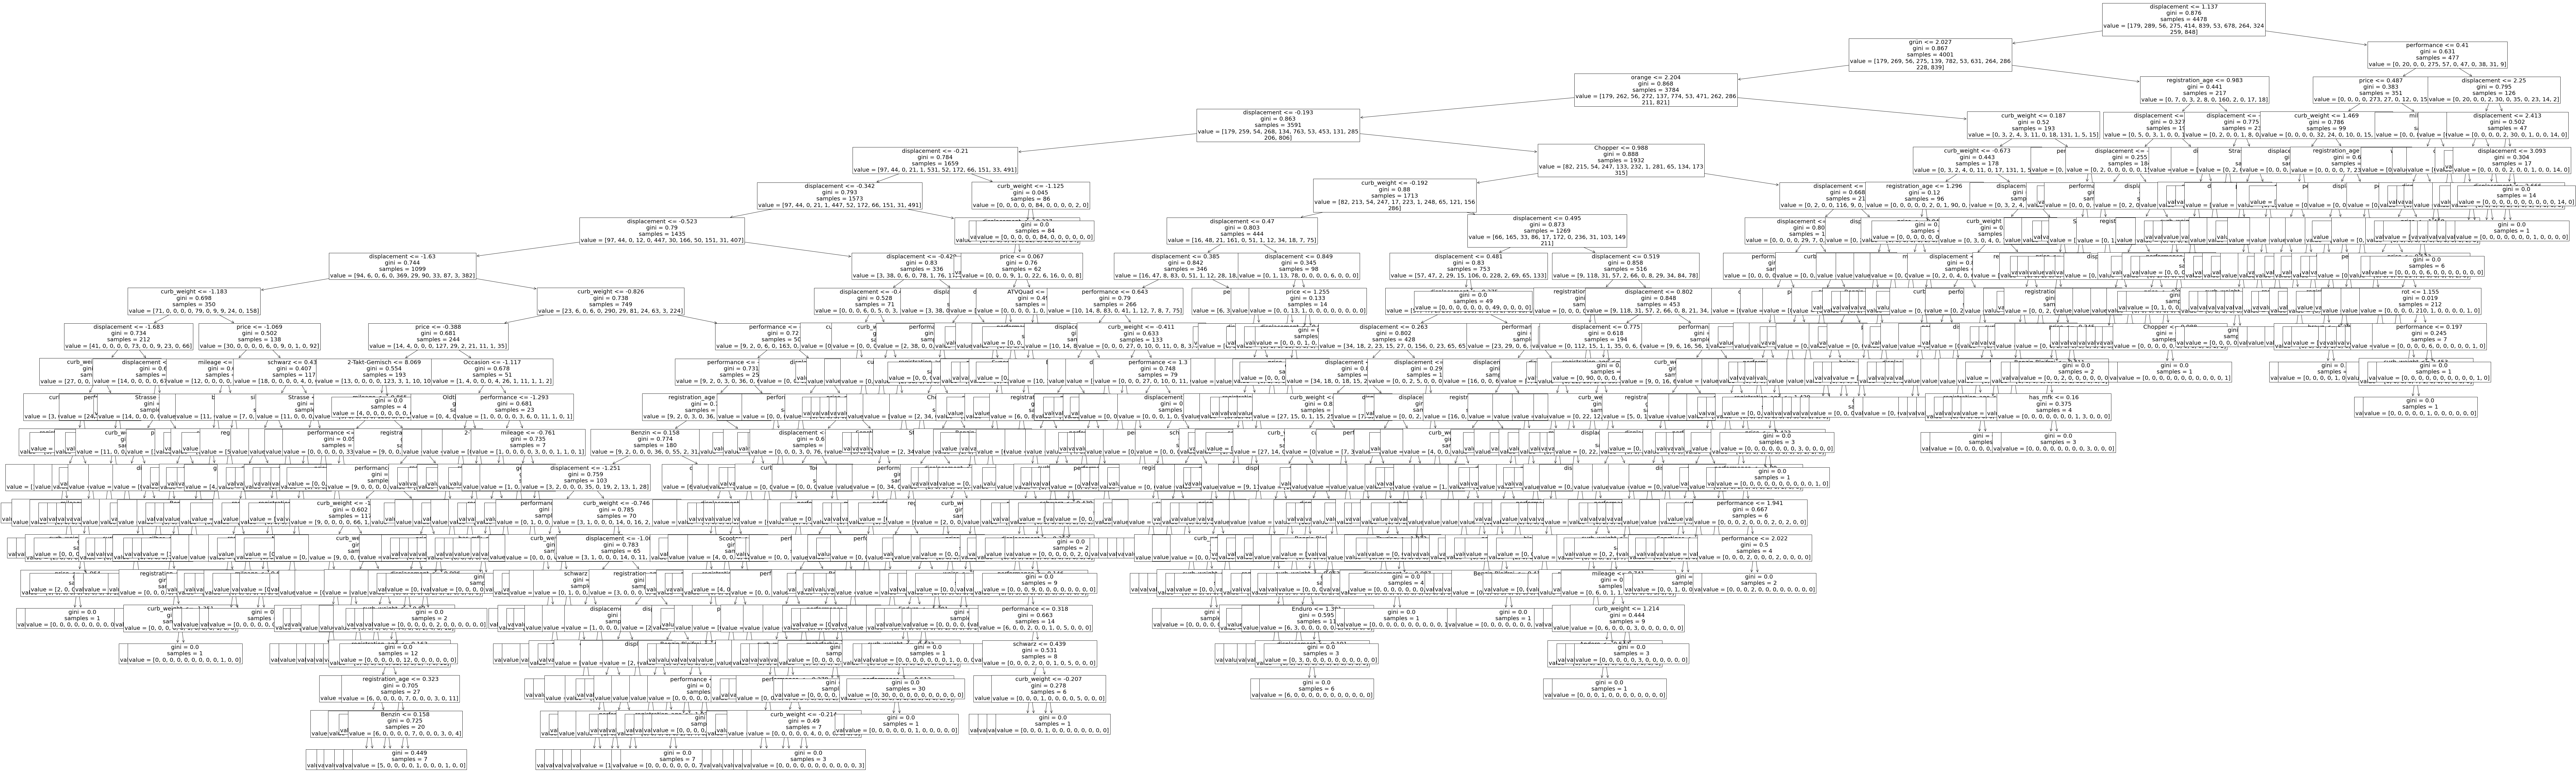

In [46]:
fig = plt.figure(figsize=(155,50))
tree.plot_tree(dtree,fontsize=20,feature_names = feature_lst.to_list() )[1]

###  - confusion matrix of the optimal decision tree model with the best f1-score.

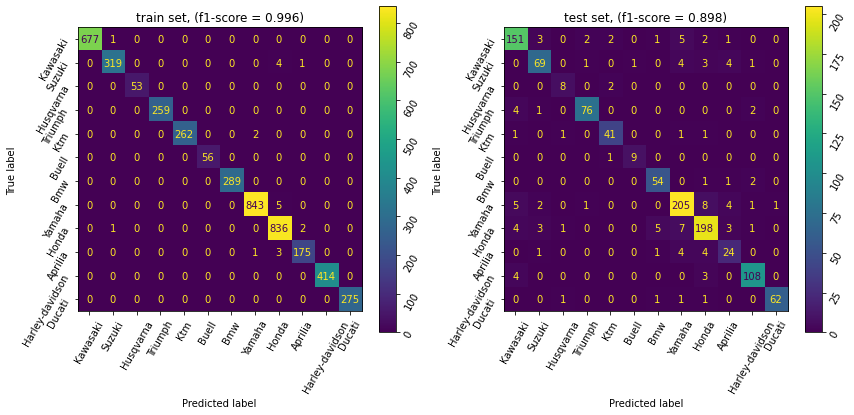

In [47]:
label_lst = moto['brand'].unique() 
cfmx_two(X_mototrain_sc,X_mototest_sc,y_mototrain,y_mototest,dtree,label_lst)

YOUR ANSWER HERE

- I set up the scan of decision tree models with maximum 30 depth. As the tree depth increasing, the f1-score increased. With depth = 21, the model has the best f1-score on test set 0.898 (the f1-score on train is 0.996). 

- A decision tree could go very deep, and the model score may get improved. We could see in my tree plot, it is a very complex tree. However a single decision tree model with high depth is highly unreliable, even when it has very good score on test set. When simply split train-test with another random_state, the model may use completely different splitting rules. This means this high depth optimal model may perform good only on this train-test set, generalize badly on other unknown data.  
    - the model stability could be increased by applying k-fold cross validation.
    
- In my tree plot:
    - displacement is the most often applied split attribute. 
    - there are many nonsense split rules, for example 'displacement < -1.63'... 
    - tree complexity could be reduced by post-pruning the nonsense splits and the splits which could not improve purity.
- confusion matrix:
    - the number of true positive of each label (on the diagonal) in test test have the similiar scale as in train set
    - In test set, each label has relatively high precision and recall, not never equal to 1. 
    - In the train set, some labels have perfect precision or recall or both. 

- Decision tree could handle our large dimension dataset (one-hot-encoded moto with 60 features). But generalization on unknown data could be very bad. It requires a lot of extra work (tree-pruning, cross-validation,random forest, etc) to avoid getting a complex overfitting tree. When apply decision tree with proper extra methods, it is a very powerful classification tool.

### Aufgabe 9 - Bestes Modell (4 Punkte)

Nun bist du frei, ein beliebiges scikit-learn Modell zur Vorhersage von `brand` zu verwenden, um eine möglichst gute Vorhersage im Sinne unserer Zielmetrik zu erreichen.  

Zeichne die Confusion Matrix auf dem Testset und diskutiere die Resultate.

In [108]:
# YOUR CODE HERE

# I will use random forest model.
from sklearn.ensemble import RandomForestClassifier
max_f1 = 0
for i in range(1,31):
    rforest =  RandomForestClassifier(n_estimators = 10*i,random_state = 75)
    rforest.fit(X_mototrain_sc,y_mototrain)
    y_train_pred = rforest.predict(X_mototrain_sc)
    y_test_pred = rforest.predict(X_mototest_sc)
    print('with {} trees, f1-score on train data: {:.3f}, f1-score on test data: {:.3f}'.format(10*i,f1_score(y_mototrain,y_train_pred,average='weighted'),f1_score(y_mototest,y_test_pred,average='weighted')))
    if f1_score(y_mototest,y_test_pred,average='weighted') > max_f1:
        max_f1 = f1_score(y_mototest,y_test_pred,average='weighted')
        max_i = 10*i  
        f1_train = f1_score(y_mototrain,y_train_pred,average='weighted')

with 10 trees, f1-score on train data: 0.995, f1-score on test data: 0.758
with 20 trees, f1-score on train data: 0.999, f1-score on test data: 0.807
with 30 trees, f1-score on train data: 1.000, f1-score on test data: 0.805
with 40 trees, f1-score on train data: 1.000, f1-score on test data: 0.815
with 50 trees, f1-score on train data: 1.000, f1-score on test data: 0.829
with 60 trees, f1-score on train data: 1.000, f1-score on test data: 0.834
with 70 trees, f1-score on train data: 1.000, f1-score on test data: 0.842
with 80 trees, f1-score on train data: 1.000, f1-score on test data: 0.835
with 90 trees, f1-score on train data: 1.000, f1-score on test data: 0.835
with 100 trees, f1-score on train data: 1.000, f1-score on test data: 0.833
with 110 trees, f1-score on train data: 1.000, f1-score on test data: 0.834
with 120 trees, f1-score on train data: 1.000, f1-score on test data: 0.837
with 130 trees, f1-score on train data: 1.000, f1-score on test data: 0.843
with 140 trees, f1-sc

### optimal random forest model based on the f1-score metric
- the model with the highest f1-score on test set

In [109]:
print('With {} trees, f1-score on train set: {:.3f}, on test set: {:.3f}'.format(max_i,f1_train,max_f1))

With 130 trees, test set has the highest f1 score 0.843, f1 score on train set is 1.0


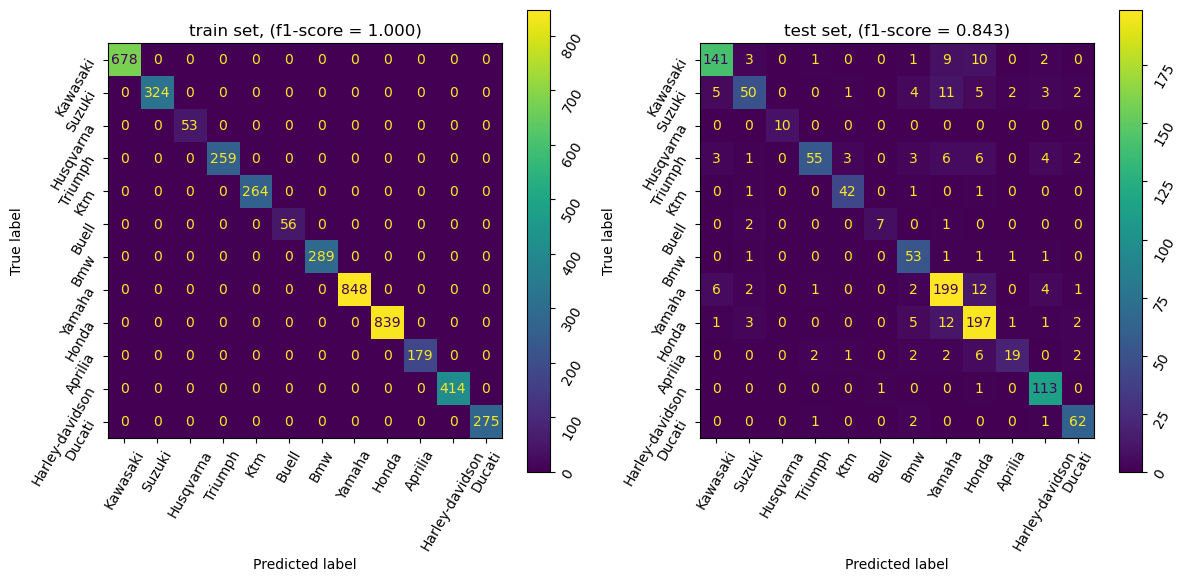

In [110]:
label_lst = moto['brand'].unique()
rforest =  RandomForestClassifier(n_estimators = max_i,random_state = 75)
rforest.fit(X_mototrain_sc,y_mototrain)
cfmx_two(X_mototrain_sc,X_mototest_sc,y_mototrain,y_mototest,rforest,label_lst)

YOUR ANSWER HERE

- Random forest model uses a collection of decision trees, where each tree works good and overfits differently from others. Rondom forest will take the average of their results, in this way overfitting problem will be reduced.  

- My optimal model is the result of 130 decision trees. It has much higher reliability than a single tree. 
- confusion matrix of test set: 
    - comparing to a single decision tree, all labels have good precision and recall.

- My optimal model has the f1-score of 1 on the train set. This means the model is likely overfitting. 
    - Because the model works on only one train dataset and one test set. 
    - To avoid the train-test-splitting bias, it is recommended to use k-fold cross validation, where it will repeat k times train-test-split. 

### Aufgabe 10 - Übersicht der Resultate (4 Punkte)

Stelle die Resultate der verschiedenen Modelle zur Vorhersage von `brand` in einer Tabelle zusammen und auch graphisch dar.  

Diskutiere deine Einsichten.

In [41]:
# YOUR CODE HERE
col = {'model_type':['logistic regression','logistic regression','MLP','MLP','decision tree','decision tree','random forest','random forest'],
       'dataset':['train','test','train','test','train','test','train','test'], 'f1-score':[ 0.474, 0.448,0.998 ,0.638 , 1, 0.903,1.000, 0.843]}
results = pd.DataFrame(data=col,index=list(range(1,9)))
results

model_type dataset  f1-score
1  logistic regression   train     0.474
2  logistic regression    test     0.448
3                  MLP   train     0.998
4                  MLP    test     0.638
5        decision tree   train     1.000
6        decision tree    test     0.903
7        random forest   train     1.000
8        random forest    test     0.843

<AxesSubplot:xlabel='model_type', ylabel='f1-score'>

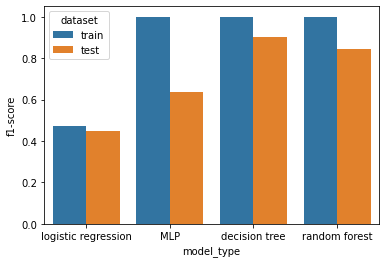

In [42]:
# plot 
sns.barplot(data=results,x = 'model_type',y = 'f1-score', hue = 'dataset')

YOUR ANSWER HERE
## Summary

- The four optimal models performance with metric f1-score:
    decision tree > random forest > MLP > logistic regression

- The best logistic regression has the score under 0.5 on both dataset. The model is underfitting. The features and target labels may be not linear correlated.
- The tree-like models are often trend to overfit. My decision tree and random forest models have very high score. They fit almost perfect on train set. It is very likely that both models are overfitting. 
- MLP model has also high score on train set


### A few possible methods may improve the model performance:

1. improve the stability and generalization of the models
    - models trained only based on one train set and one test set are usually unstable, and generalize not good.
    - apply k-fold cross-validation will improve the model generalization on unknown (not the test set) dataset.

2. resampling
    - the target label 'brand' is imbalanced. Apply undersampling or oversampling to get the balanced target labels may help to improve models. 
    
3. reduce number of features
    - The dataset with one-hot encoding has 60 input features. In the exploratory data analysis and decision tree plot, we have already seen that, some features have high importance to classify the target labels, some less, some may be not important at all. It worths to have a check if the model performance is getting better and more reliable with the reduced features.
    - possible methods:
        - step wise feature selection. 
        - select the top-n important features from random forest model (more reliable when combine with cross-validation). 
        - using dimensionality reduction method, e.g. principal component analysis, non-negative matrix factorization.
